In [1]:
import numpy as np 
import pandas as pd 
import string
import nltk
string.punctuation
from nltk.corpus import stopwords

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

In [2]:
data = pd.read_csv("/kaggle/input/data-work/data_work")
data

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,5.0,True,"11 9, 2012",A2M1CU2IRZG0K9,0005089549,{'Format:': ' VHS Tape'},Terri,So sorry I didn't purchase this years ago when...,Amazing!,1352419200
1,5.0,True,"12 30, 2011",AFTUJYISOFHY6,0005089549,{'Format:': ' VHS Tape'},Melissa D. Abercrombie,Believe me when I tell you that you will recei...,Great Gospel VHS of the Cathedrals!,1325203200
2,5.0,True,"04 21, 2005",A3JVF9Y53BEOGC,000503860X,{'Format:': ' DVD'},Anthony Thompson,"I have seen X live many times, both in the ear...",A great document of a great band,1114041600
3,5.0,True,"04 6, 2005",A12VPEOEZS1KTC,000503860X,{'Format:': ' DVD'},JadeRain,"I was so excited for this! Finally, a live co...",YES!! X LIVE!!,1112745600
4,5.0,True,"12 3, 2010",ATLZNVLYKP9AZ,000503860X,{'Format:': ' DVD'},T. Fisher,X is one of the best punk bands ever. I don't ...,X have still got it,1291334400
...,...,...,...,...,...,...,...,...,...,...
399995,5.0,True,"08 31, 2017",A2RCR40SNWKRH7,B00065W99Y,{'Size Name:': ' 1 Gallon'},The Dirt Guy,I used this cleaner as part of the first step ...,Amazing Cleaner,1504137600
399996,3.0,True,"03 21, 2016",A2C8BZOZKGW57H,B000VK4Q4K,{'Style:': ' 85-Lumen'},Joel C.,The flashlight is fairly cheaply made and I ha...,Once installed it worked great.,1458518400
399997,5.0,True,"11 4, 2017",A3QX3TEN2FS31K,B000I97FHY,{'Color:': ' white'},LEROY A DUCK,Does what its suppose to.,Works well,1509753600
399998,5.0,True,"05 31, 2015",A1QZU5ZZJC5QYI,B0035YRCR2,{'Style:': ' Paddle On/Off Switch'},Rick C.,great,Five Stars,1433030400


In [3]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         400000 non-null  float64
 1   verified        400000 non-null  bool   
 2   reviewTime      400000 non-null  object 
 3   reviewerID      400000 non-null  object 
 4   asin            400000 non-null  object 
 5   style           400000 non-null  object 
 6   reviewerName    400000 non-null  object 
 7   reviewText      400000 non-null  object 
 8   summary         400000 non-null  object 
 9   unixReviewTime  400000 non-null  int64  
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 27.8+ MB


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


In [4]:
data['overall'].value_counts()

5.0    267956
4.0     71075
3.0     30979
1.0     15768
2.0     14222
Name: overall, dtype: int64

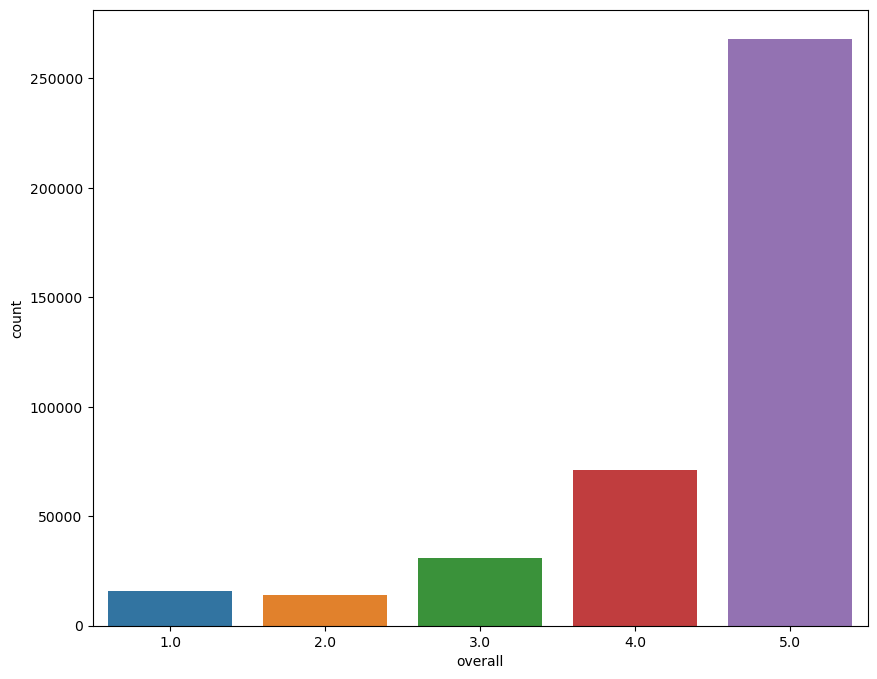

In [5]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='overall', data=data)

In [6]:
data['verified'].value_counts()

True    400000
Name: verified, dtype: int64

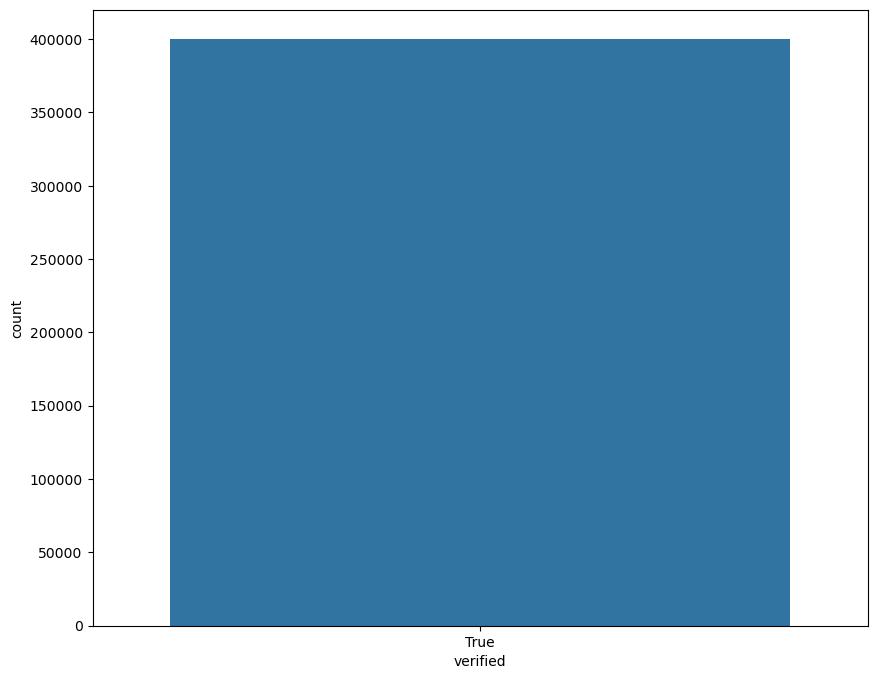

In [7]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='verified', data=data)

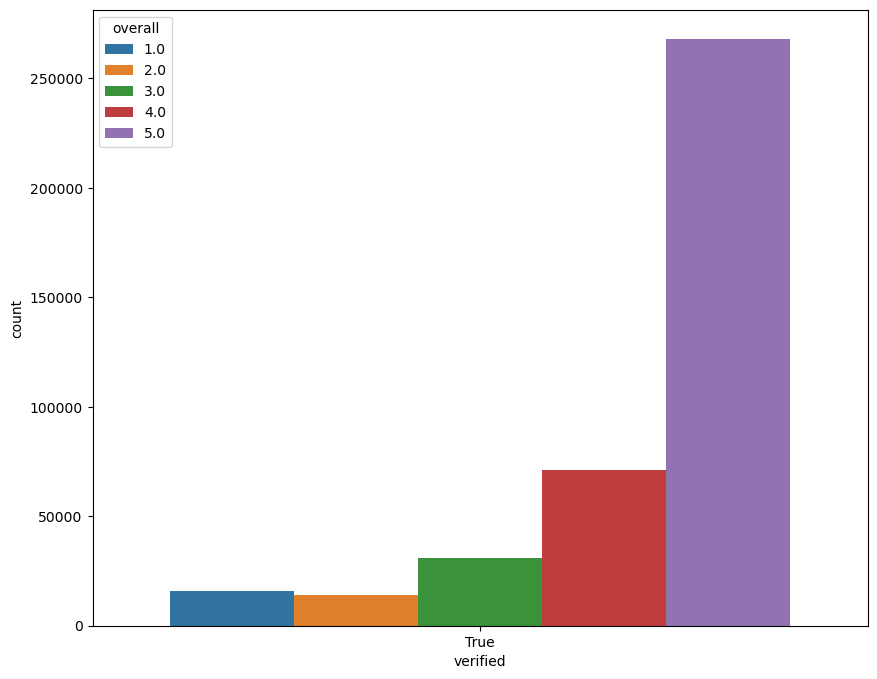

In [8]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='verified', hue="overall", data=data)

У нас отзывы все проверены поэтому нет разделений на фальшивые и проверенные. Поэтому график выше особо нам не нужен.

In [9]:
data['reviewTime'].nunique()

7223

## Преобразование времени в нормальный вид

In [10]:
data["reviewTime"] = pd.to_datetime(data["reviewTime"]) # convert to datetime

In [11]:
print(data.head(5))
print(data.info())

   overall  verified reviewTime      reviewerID        asin  \
0      5.0      True 2012-11-09  A2M1CU2IRZG0K9  0005089549   
1      5.0      True 2011-12-30   AFTUJYISOFHY6  0005089549   
2      5.0      True 2005-04-21  A3JVF9Y53BEOGC  000503860X   
3      5.0      True 2005-04-06  A12VPEOEZS1KTC  000503860X   
4      5.0      True 2010-12-03   ATLZNVLYKP9AZ  000503860X   

                      style            reviewerName  \
0  {'Format:': ' VHS Tape'}                   Terri   
1  {'Format:': ' VHS Tape'}  Melissa D. Abercrombie   
2       {'Format:': ' DVD'}        Anthony Thompson   
3       {'Format:': ' DVD'}                JadeRain   
4       {'Format:': ' DVD'}               T. Fisher   

                                          reviewText  \
0  So sorry I didn't purchase this years ago when...   
1  Believe me when I tell you that you will recei...   
2  I have seen X live many times, both in the ear...   
3  I was so excited for this!  Finally, a live co...   
4  X is on

Теперь видно нагляднее, что дата в более приемлимом виде и info дает информацию о дате не как об объекте. Теперь добавим информацию о днях, месяцах и годах

In [12]:
# преобразуем reviewTime  to day, month and year
data['day'] = data['reviewTime'].dt.day
data['month'] = data['reviewTime'].dt.month 
data['year'] = data['reviewTime'].dt.year

In [13]:
data

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,day,month,year
0,5.0,True,2012-11-09,A2M1CU2IRZG0K9,0005089549,{'Format:': ' VHS Tape'},Terri,So sorry I didn't purchase this years ago when...,Amazing!,1352419200,9,11,2012
1,5.0,True,2011-12-30,AFTUJYISOFHY6,0005089549,{'Format:': ' VHS Tape'},Melissa D. Abercrombie,Believe me when I tell you that you will recei...,Great Gospel VHS of the Cathedrals!,1325203200,30,12,2011
2,5.0,True,2005-04-21,A3JVF9Y53BEOGC,000503860X,{'Format:': ' DVD'},Anthony Thompson,"I have seen X live many times, both in the ear...",A great document of a great band,1114041600,21,4,2005
3,5.0,True,2005-04-06,A12VPEOEZS1KTC,000503860X,{'Format:': ' DVD'},JadeRain,"I was so excited for this! Finally, a live co...",YES!! X LIVE!!,1112745600,6,4,2005
4,5.0,True,2010-12-03,ATLZNVLYKP9AZ,000503860X,{'Format:': ' DVD'},T. Fisher,X is one of the best punk bands ever. I don't ...,X have still got it,1291334400,3,12,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,5.0,True,2017-08-31,A2RCR40SNWKRH7,B00065W99Y,{'Size Name:': ' 1 Gallon'},The Dirt Guy,I used this cleaner as part of the first step ...,Amazing Cleaner,1504137600,31,8,2017
399996,3.0,True,2016-03-21,A2C8BZOZKGW57H,B000VK4Q4K,{'Style:': ' 85-Lumen'},Joel C.,The flashlight is fairly cheaply made and I ha...,Once installed it worked great.,1458518400,21,3,2016
399997,5.0,True,2017-11-04,A3QX3TEN2FS31K,B000I97FHY,{'Color:': ' white'},LEROY A DUCK,Does what its suppose to.,Works well,1509753600,4,11,2017
399998,5.0,True,2015-05-31,A1QZU5ZZJC5QYI,B0035YRCR2,{'Style:': ' Paddle On/Off Switch'},Rick C.,great,Five Stars,1433030400,31,5,2015


In [14]:
data['year'].value_counts()

2015    75127
2016    73254
2014    60713
2017    46806
2013    35538
2018    14591
2012    12997
2011     7605
2007     7518
2005     7431
2006     7036
2008     6856
2010     6808
2009     6797
2004     6576
2002     6041
2000     5743
2001     5671
2003     5550
1999     1228
1998      114
Name: year, dtype: int64

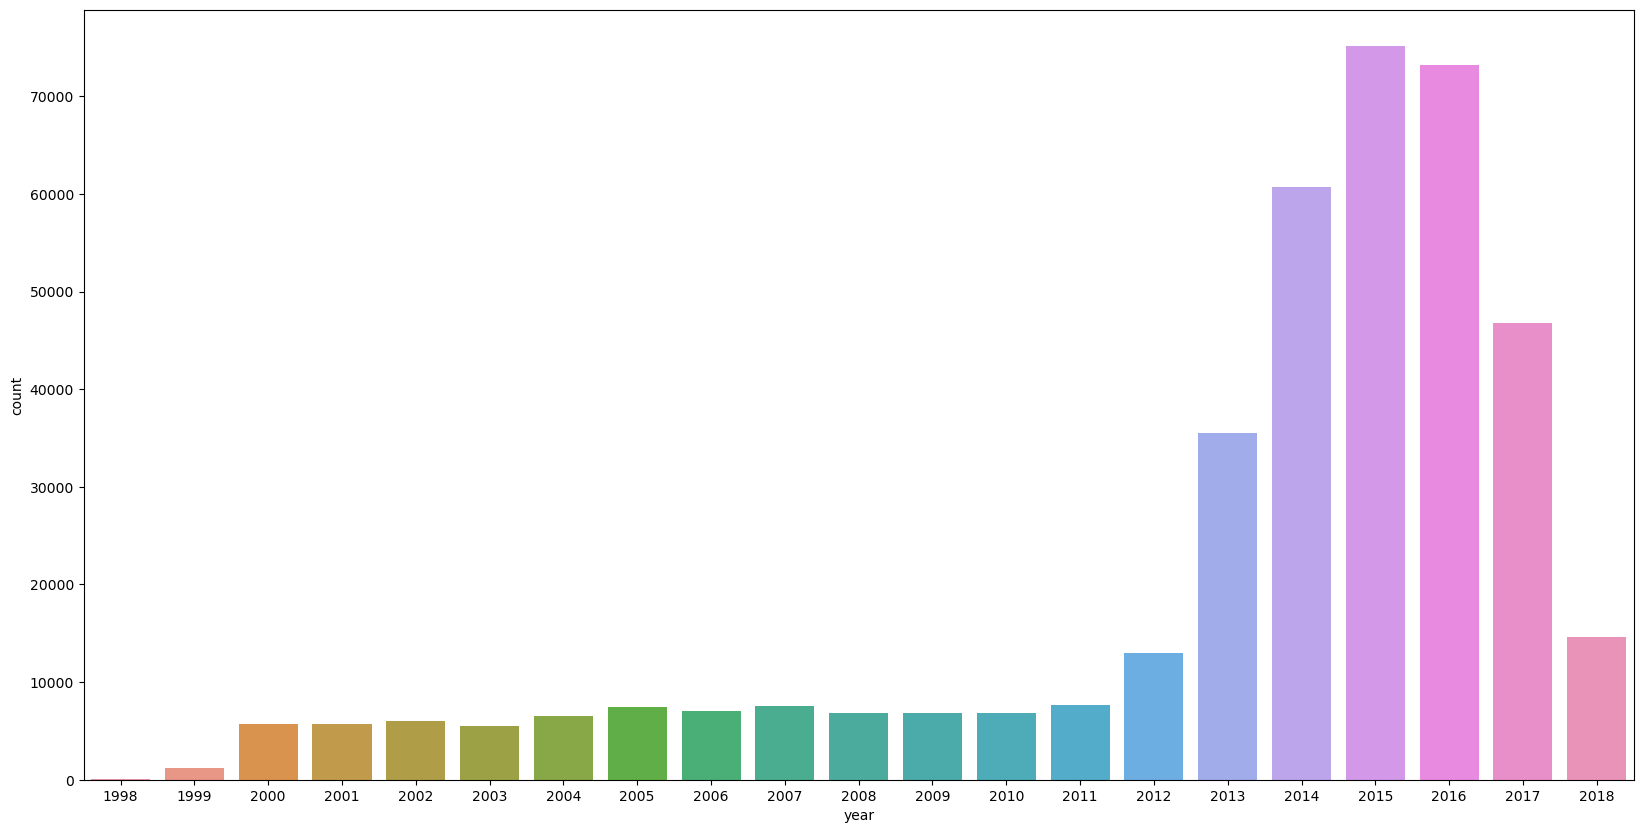

In [15]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='year', data=data)

Наши данные за 20 лет и в основном данные получены за последние года, что непременно хорошо. 

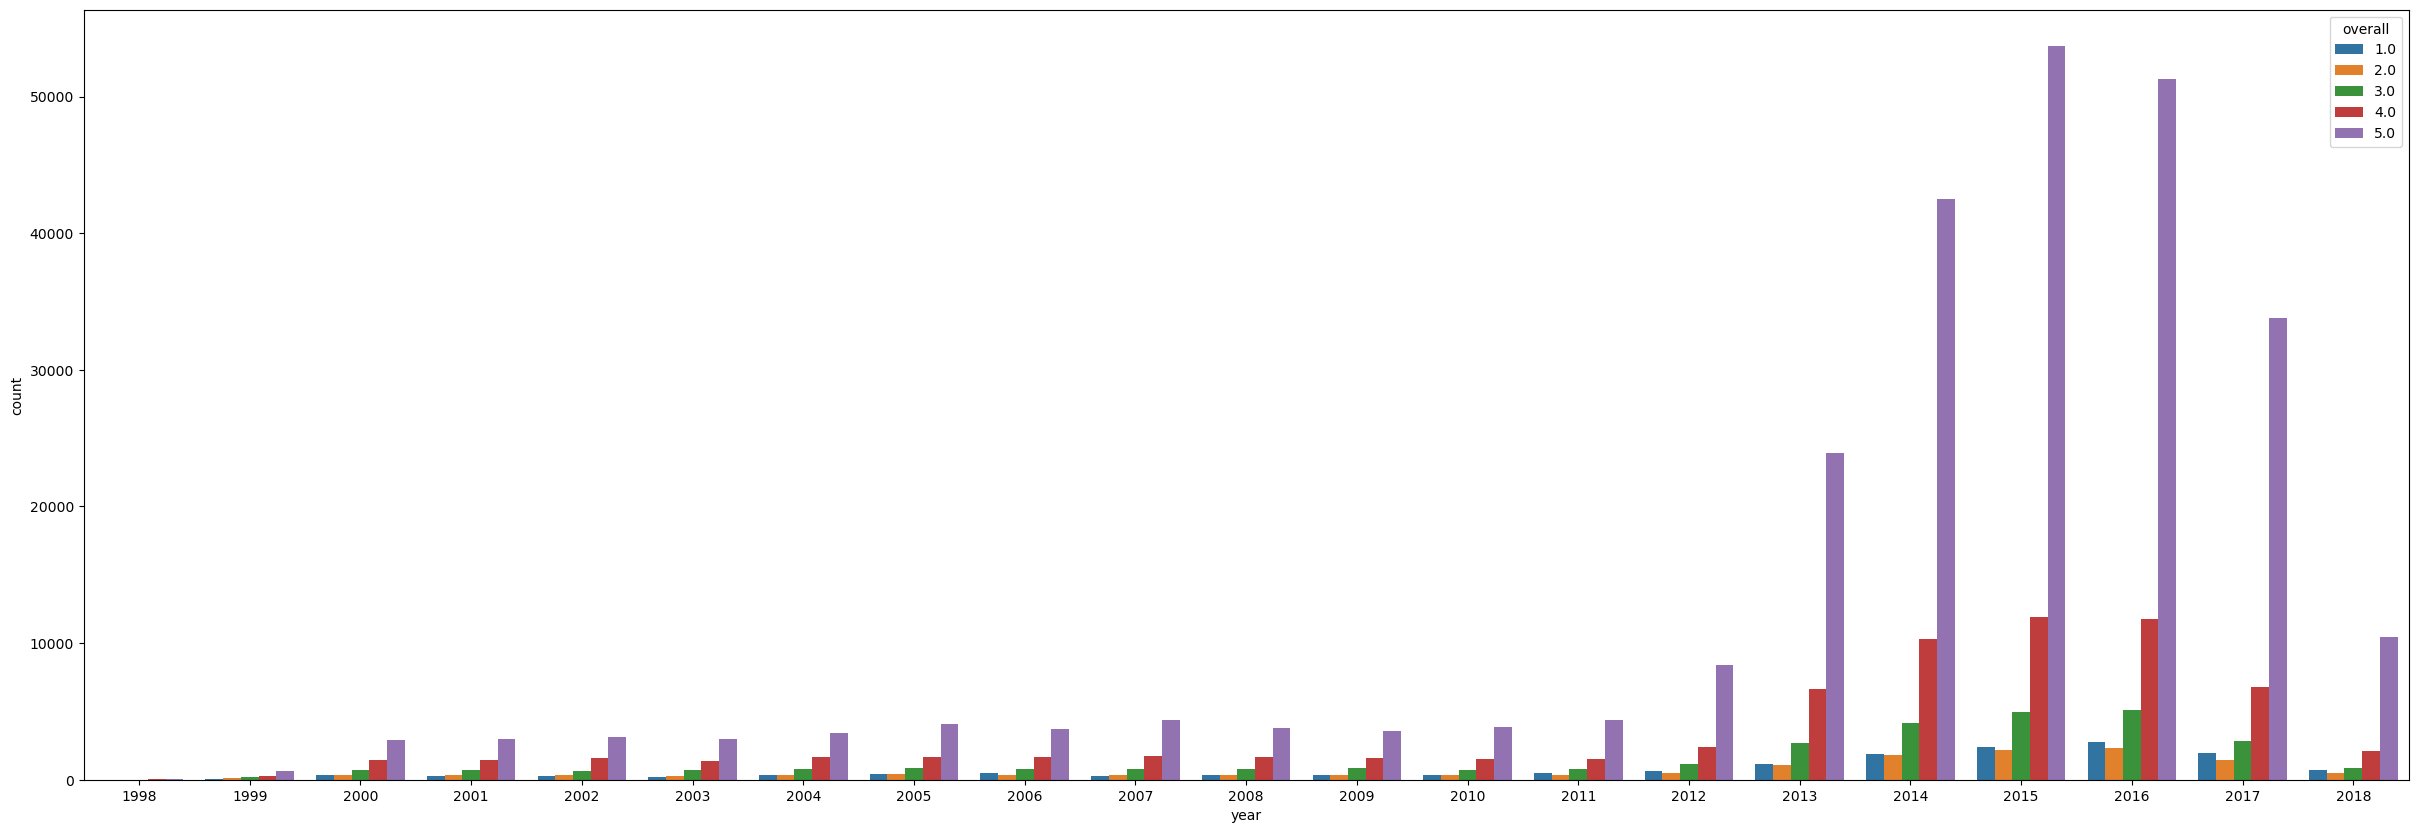

In [16]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='year', hue='overall', data=data)

In [17]:
data['month'].value_counts()

1     39945
12    37299
3     35952
2     34620
8     33644
7     33120
10    32007
9     31333
5     30936
11    30623
4     30610
6     29911
Name: month, dtype: int64

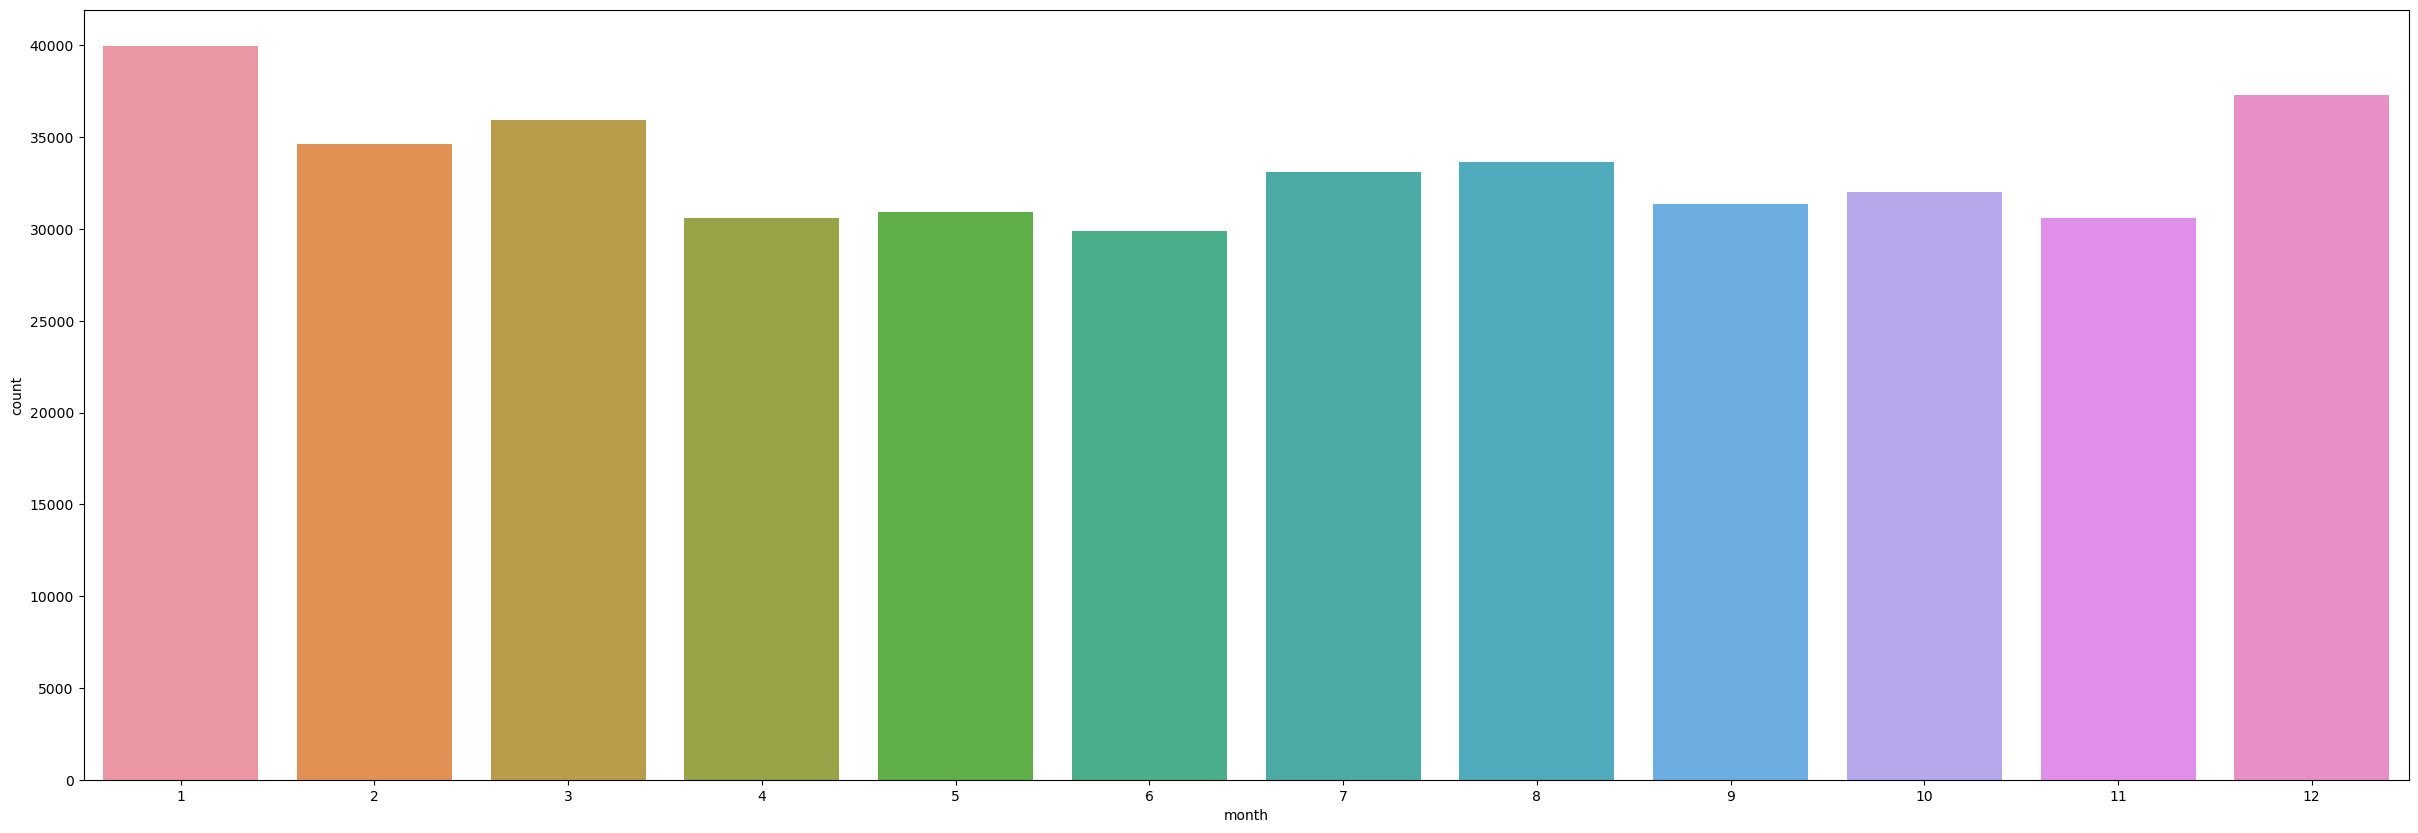

In [18]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='month',data=data)

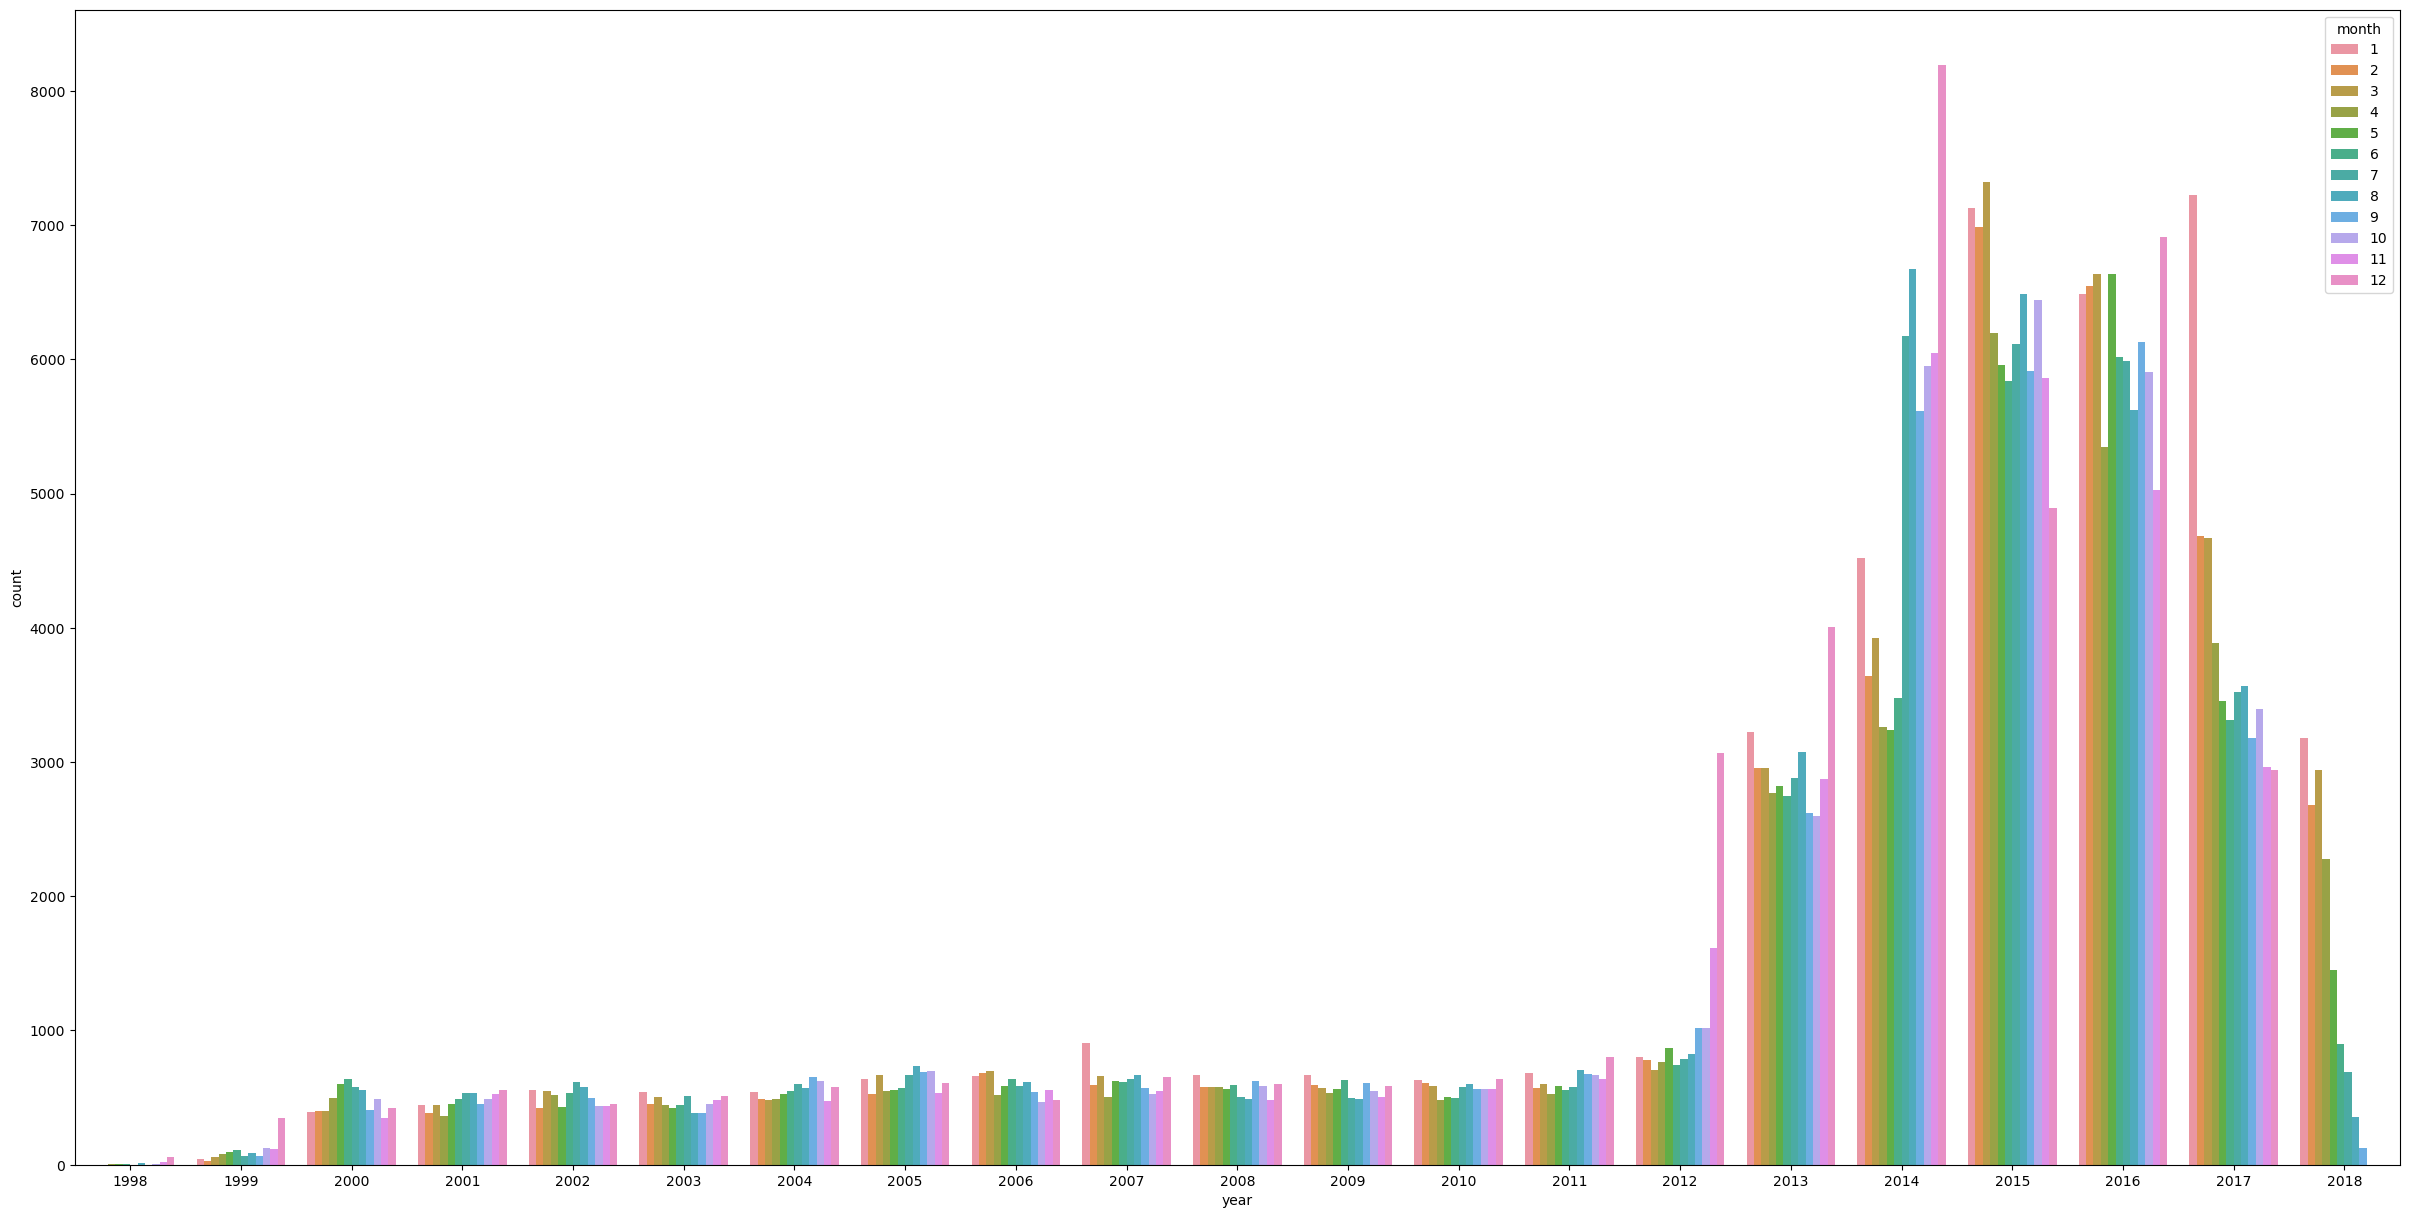

In [19]:
plt.figure(figsize=(30,15))
ax = sns.countplot(x='year', hue='month', data=data)

Как видно у нас с 13 по 17 года хорошая активность в последние месяцы (11-12), но в 17 году уже в начале года хороший бум

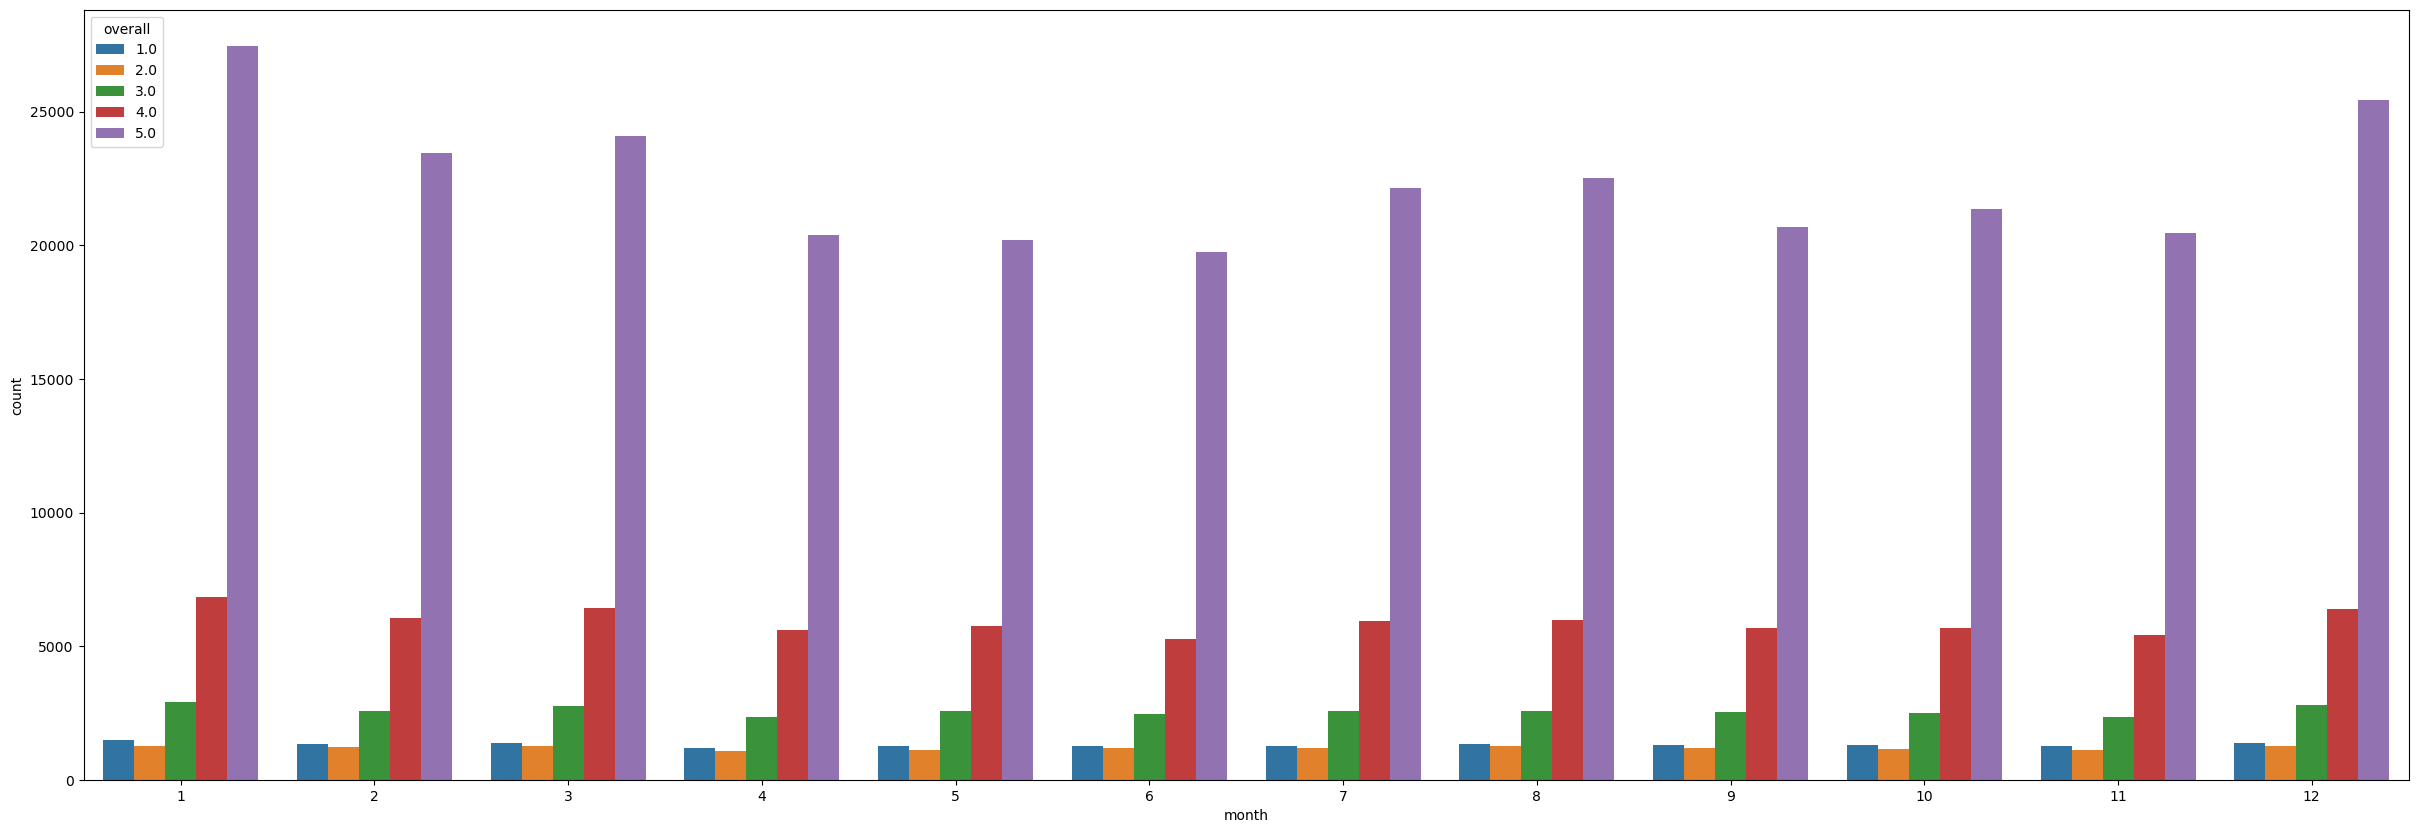

In [20]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='month', hue='overall', data=data)

По этим данным сложно что-то сказать, разве что люди реже покупают и ставят оценки в середину года, а более активны в начале и в конце

In [21]:
data.groupby('month')['overall'].mean()

month
1     4.439755
2     4.416638
3     4.407655
4     4.401927
5     4.374030
6     4.374110
7     4.405284
8     4.398704
9     4.380110
10    4.394539
11    4.396467
12    4.429046
Name: overall, dtype: float64

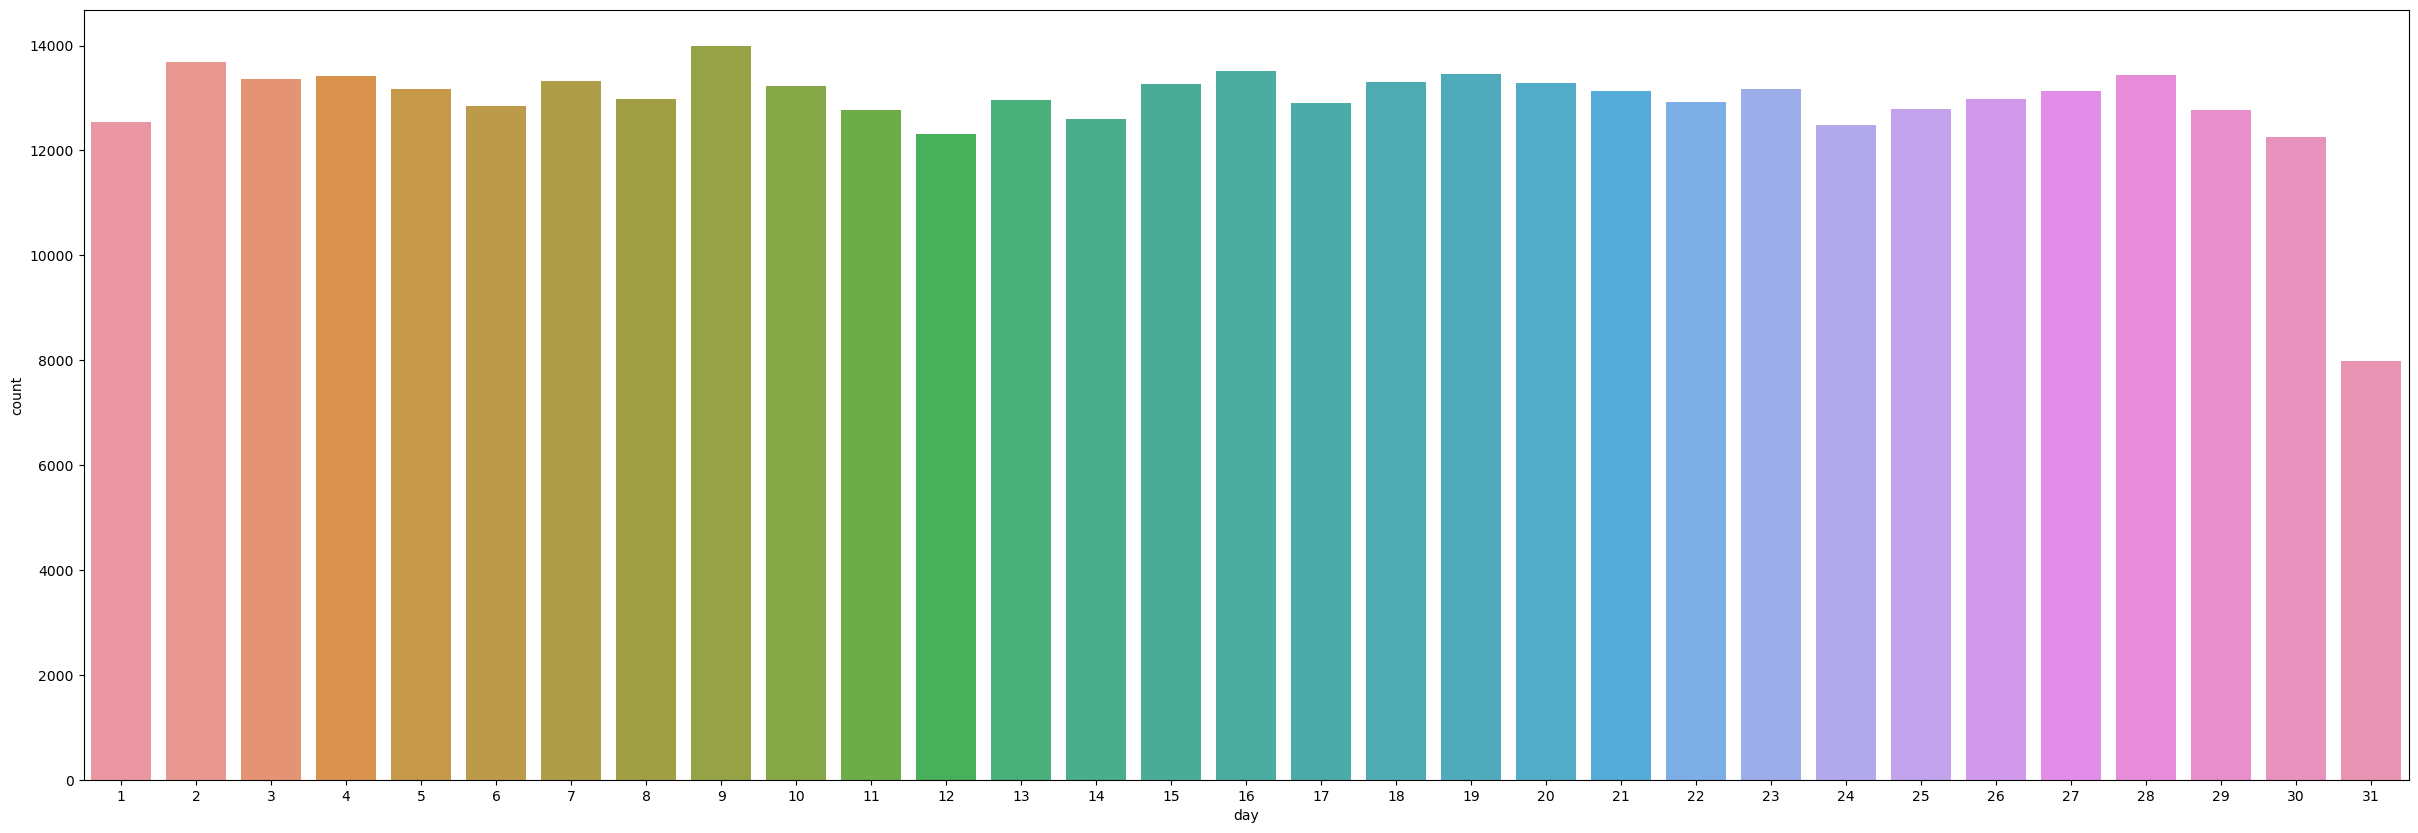

In [22]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='day',data=data)

In [23]:
data.groupby('day')['overall'].mean()

day
1     4.398102
2     4.396579
3     4.436897
4     4.415176
5     4.418513
6     4.399813
7     4.391794
8     4.415941
9     4.401316
10    4.407041
11    4.404197
12    4.401268
13    4.405520
14    4.403304
15    4.389517
16    4.396035
17    4.398931
18    4.382980
19    4.404119
20    4.387555
21    4.432757
22    4.407694
23    4.385614
24    4.393189
25    4.399734
26    4.403868
27    4.399832
28    4.417913
29    4.425250
30    4.386447
31    4.376881
Name: overall, dtype: float64

Как видно в 9 день все очнь хорошо и много записей(еще во 2 и в 16 дни). И резко уменьшение в 31 день.

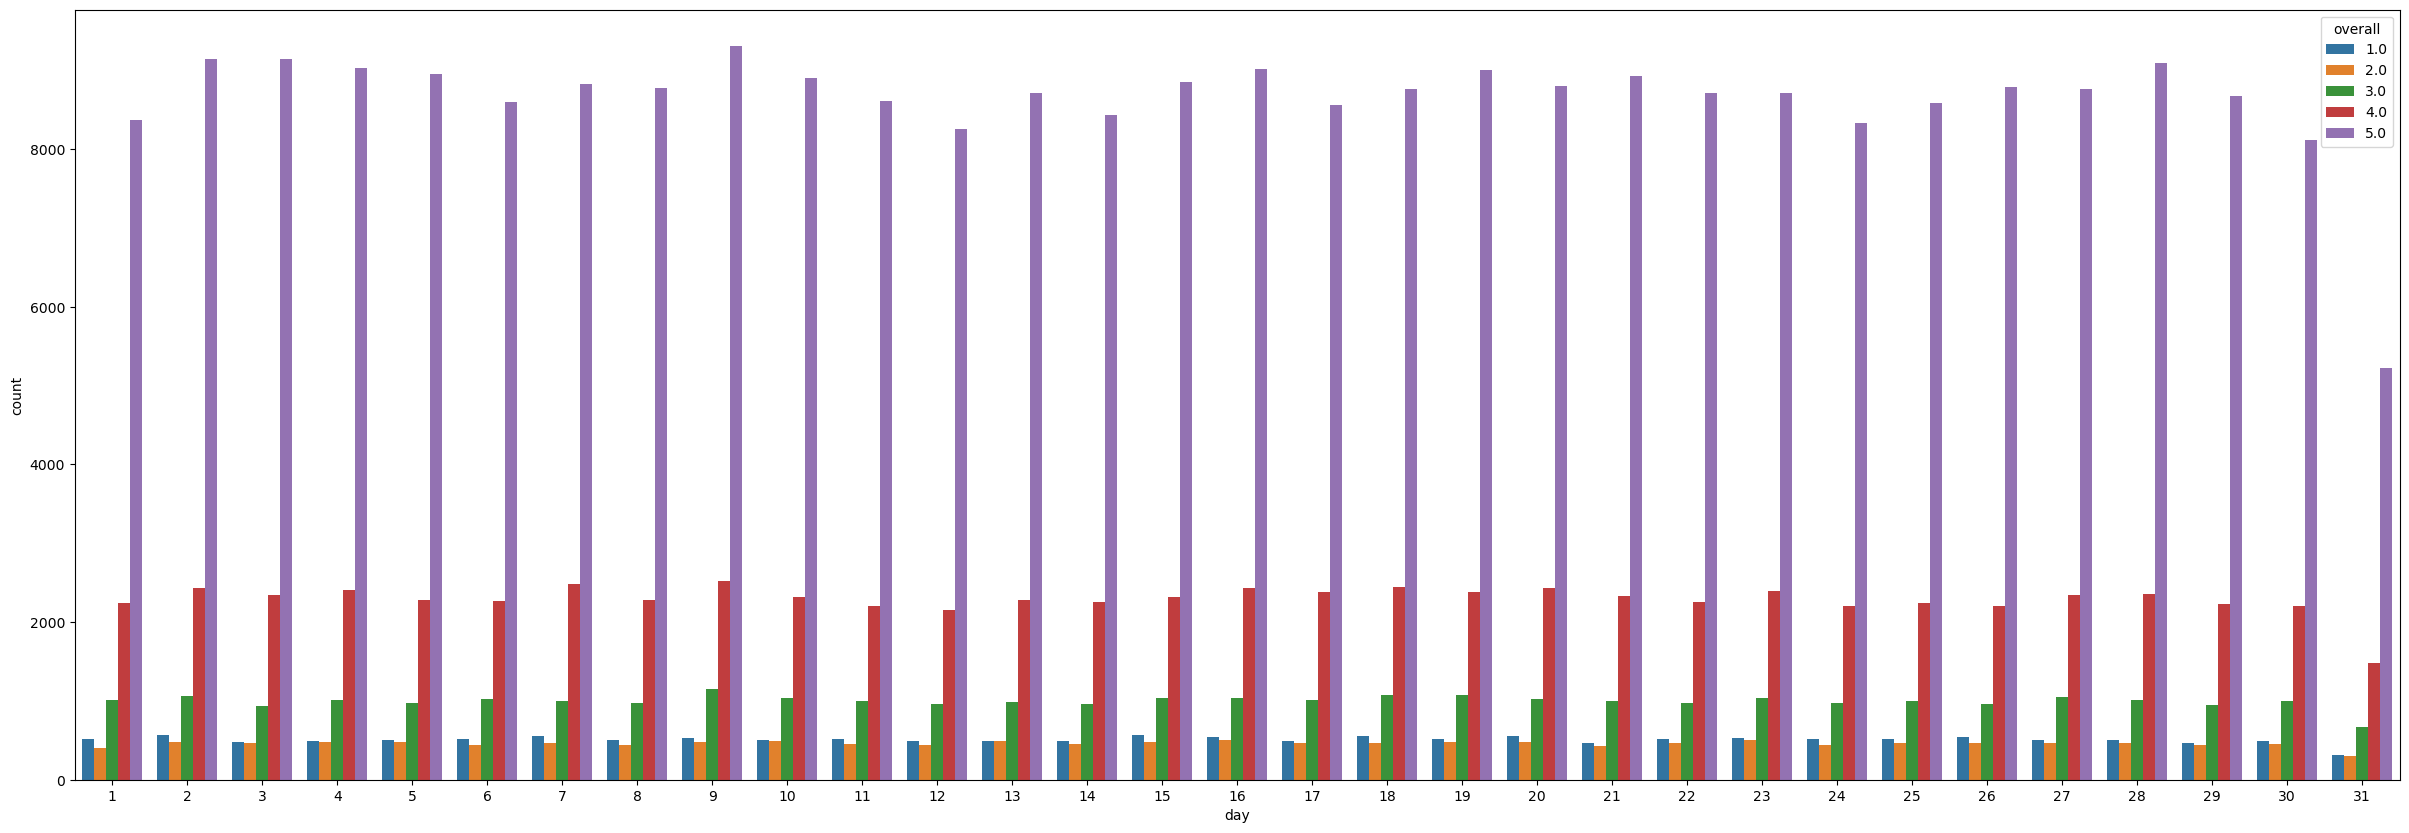

In [24]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x='day', hue="overall", data=data)

График сверху лишний раз показывает что оценки в 9 день превосходят по количеству оценки в другие дни. И также вывод но в обратную сторону можно сделать с 31 днем. На самом деле легко объяснить проблему 31 дня так как не во всех месяцах есть 31 день. 

## Посмотрим на reviewers

In [25]:
data['reviewerID'].nunique()

211507

In [26]:
data['reviewerName'].nunique()

164789

Обычно колонки выше должны совпадать друг с другом. Но тут имен меньше, а это значит, что два разных человек, но с одинаковыми именами попались нам. Вообще можно удалить эту колонку так как мы все равно будем работать с ID, а имена нас особо не интересуют 

In [27]:
data.drop(columns=['reviewerName'],inplace=True)

In [28]:
data

,overall,verified,reviewTime,reviewerID,asin,style,reviewText,summary,unixReviewTime,day,month,year
0,5.0,True,2012-11-09,A2M1CU2IRZG0K9,0005089549,{'Format:': ' VHS Tape'},So sorry I didn't purchase this years ago when...,Amazing!,1352419200,9,11,2012
1,5.0,True,2011-12-30,AFTUJYISOFHY6,0005089549,{'Format:': ' VHS Tape'},Believe me when I tell you that you will recei...,Great Gospel VHS of the Cathedrals!,1325203200,30,12,2011
2,5.0,True,2005-04-21,A3JVF9Y53BEOGC,000503860X,{'Format:': ' DVD'},"I have seen X live many times, both in the ear...",A great document of a great band,1114041600,21,4,2005
3,5.0,True,2005-04-06,A12VPEOEZS1KTC,000503860X,{'Format:': ' DVD'},"I was so excited for this! Finally, a live co...",YES!! X LIVE!!,1112745600,6,4,2005
4,5.0,True,2010-12-03,ATLZNVLYKP9AZ,000503860X,{'Format:': ' DVD'},X is one of the best punk bands ever. I don't ...,X have still got it,1291334400,3,12,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
399995,5.0,True,2017-08-31,A2RCR40SNWKRH7,B00065W99Y,{'Size Name:': ' 1 Gallon'},I used this cleaner as part of the first step ...,Amazing Cleaner,1504137600,31,8,2017
399996,3.0,True,2016-03-21,A2C8BZOZKGW57H,B000VK4Q4K,{'Style:': ' 85-Lumen'},The flashlight is fairly cheaply made and I ha...,Once installed it worked great.,1458518400,21,3,2016
399997,5.0,True,2017-11-04,A3QX3TEN2FS31K,B000I97FHY,{'Color:': ' white'},Does what its suppose to.,Works well,1509753600,4,11,2017
399998,5.0,True,2015-05-31,A1QZU5ZZJC5QYI,B0035YRCR2,{'Style:': ' Paddle On/Off Switch'},great,Five Stars,1433030400,31,5,2015


In [29]:
data.groupby('reviewerID')['overall'].mean().sort_values(ascending=False).head(100)

reviewerID
A2WGB86NWWI6VN    5.0
A2S2ZFP39S2EW2    5.0
A2S2RVE2D5EOLN    5.0
A2S2S0A3VIPBAG    5.0
A2S2S21D1Y87IF    5.0
                 ... 
A2RZVNGA85UTI     5.0
A2RZVFO6AAHDYM    5.0
A2RZVAF1QBKYV6    5.0
A2RZUU6CKPX9LT    5.0
A2RZURC8UWZICH    5.0
Name: overall, Length: 100, dtype: float64

In [30]:
data.groupby('reviewerID')['asin'].count().sort_values(ascending=False).head(100)

reviewerID
A16CZRQL23NOIW    381
A1GGOC9PVDXW7Z    312
A7Y6AVS576M03     280
ANCOMAI0I7LVG     279
A10ODC971MDHV8    272
                 ... 
A3PT1WF4F1TV3D     70
A1POFVVXUZR3IQ     70
A1NSDP9YZXLMDX     69
AQ8DU6XVA3USJ      69
A2FRKEXDXDN1KI     68
Name: asin, Length: 100, dtype: int64

Каждый пользователь входящий в топ 100 имеет больше 50 отзывов на товары(товары для дома, офисные продукты, кино и тв)

## Посмотрим на топ 3 людей по количеству отзывов

In [31]:
data.loc[data['reviewerID']=='A16CZRQL23NOIW'].groupby('overall')['asin'].count()

overall
1.0      1
2.0      1
3.0      5
4.0     50
5.0    324
Name: asin, dtype: int64

In [32]:
data.loc[data['reviewerID']=='A1GGOC9PVDXW7Z'].groupby('overall')['asin'].count()

overall
1.0      3
2.0     19
3.0     40
4.0     98
5.0    152
Name: asin, dtype: int64

In [33]:
data.loc[data['reviewerID']=='A7Y6AVS576M03'].groupby('overall')['asin'].count()

overall
2.0      2
3.0      5
4.0     30
5.0    243
Name: asin, dtype: int64

У **топ-1 и топ-3 пользователей около **98%**** всех оценок это хорошие оценки, чего не скажешь о топ-2 участнике. У **топ-2 77%** всего хороших оценок товарам. 

In [34]:
data['asin'].nunique() #количество уникальных товаров из всего датасета примерно составляет 7,6% из всех товаров

30454

In [35]:
# топ лучших по средним оценкам среди товаров
data.groupby('asin')['overall'].mean().sort_values(ascending=False).head(100)

asin
B01C46O742    5.0
B000LNSHSS    5.0
B0063AB3XE    5.0
B01E87X5DO    5.0
B01E7NLKAE    5.0
             ... 
B000KNNI1A    5.0
B0066K529W    5.0
B000KNPUKC    5.0
B0066HFMHC    5.0
B000KOW3KG    5.0
Name: overall, Length: 100, dtype: float64

In [36]:
data['asin'].value_counts().head(10)

0790729628    2359
0793906091    2047
6301966554    1570
0792151712    1512
6303042503    1498
0782010792    1232
6303212379    1186
6300246817    1180
6302091632    1094
0783225857    1081
Name: asin, dtype: int64

In [37]:
# то есть тут товар со средним 5.0, но тут всего 2 отзыва и оба 5.0
data.loc[data['asin']=='B01C46O742'].groupby('overall').count() 

,verified,reviewTime,reviewerID,asin,style,reviewText,summary,unixReviewTime,day,month,year
overall,,,,,,,,,,,
5.0,2,2,2,2,2,2,2,2,2,2,2


In [38]:
# один товар с одним отзывом
data.loc[data['asin']=='B000LNSHSS'].groupby('overall').count() 

,verified,reviewTime,reviewerID,asin,style,reviewText,summary,unixReviewTime,day,month,year
overall,,,,,,,,,,,
5.0,1,1,1,1,1,1,1,1,1,1,1


In [39]:
# тут один товар с одним отзывом
data.loc[data['asin']=='B0063AB3XE'].groupby('overall').count() 

,verified,reviewTime,reviewerID,asin,style,reviewText,summary,unixReviewTime,day,month,year
overall,,,,,,,,,,,
5.0,1,1,1,1,1,1,1,1,1,1,1


In [40]:
# посмотрим на отзыв где большое количество оценок
# почти 9.5% оценок составляет 1 и 2 из всех отзывов этого товара(меньше 10 процентов что достаточно хорошо)
data.loc[data['asin']=='0790729628'].groupby('overall').count() 

,verified,reviewTime,reviewerID,asin,style,reviewText,summary,unixReviewTime,day,month,year
overall,,,,,,,,,,,
1.0,111,111,111,111,111,111,111,111,111,111,111
2.0,112,112,112,112,112,112,112,112,112,112,112
3.0,180,180,180,180,180,180,180,180,180,180,180
4.0,360,360,360,360,360,360,360,360,360,360,360
5.0,1596,1596,1596,1596,1596,1596,1596,1596,1596,1596,1596


In [41]:
# оценка фильма
data.query("asin == '0790729628'")

,overall,verified,reviewTime,reviewerID,asin,style,reviewText,summary,unixReviewTime,day,month,year
43847,5.0,True,2018-04-28,A9N2BGGBAH8Q3,0790729628,{'Format:': ' Blu-ray'},great product. exactly as expected/described.,Five Stars,1524873600,28,4,2018
43848,4.0,True,2018-04-27,A2CMX52MWBU1B,0790729628,{'Format:': ' Blu-ray'},"Great film, directing, editing, script, casti...",Four Stars,1524787200,27,4,2018
43849,4.0,True,2018-04-24,A3FV4KD7VOV4F2,0790729628,{'Format:': ' Blu-ray'},I got this Blu-Ray mainly as a comparison to t...,Hasn't Aged Well,1524528000,24,4,2018
43857,3.0,True,2018-04-19,A32L4XEPPXTW1E,0790729628,{'Format:': ' Amazon Video'},Good to see this version as I had forgotton it...,Good to see this version as I had forgotton it,1524096000,19,4,2018
43858,5.0,True,2018-04-17,A219CBDNLGGH88,0790729628,{'Format:': ' Blu-ray'},"A few theater-version scenes were left out, bu...","The Best Version of the orginal ""Blade Runner'",1523923200,17,4,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
47579,5.0,True,1999-04-16,A3LGJA0J6A61I5,0790729628,{'Format:': ' DVD'},This is a film which requires its audience to ...,Grey Matter,924220800,16,4,1999
47592,2.0,True,1999-02-01,AV7ATN4TN8AQT,0790729628,{'Format:': ' DVD'},"Okay, on its own merits this is an okay film, ...",So much for the electric sheep...,917827200,1,2,1999
47601,4.0,True,1998-12-27,A2VLM3Z7KYN98P,0790729628,{'Format:': ' DVD'},"The obviously contrived ""Hollywood ending"" of ...",Baby with the Bathwater,914716800,27,12,1998
47609,4.0,True,1998-12-05,AQP1VPK16SVWM,0790729628,{'Format:': ' DVD'},There never will be a perfect version of this ...,Flawed classic from Scott and Ford,912816000,5,12,1998


In [42]:
data['summary'].nunique()

243524

Можно удалить время unixReviewTime так как у нас уже есть колонки со временем и думаю эта не понадобится

In [43]:
data.drop(columns=['unixReviewTime'],inplace=True) #droping columns

In [44]:
data

,overall,verified,reviewTime,reviewerID,asin,style,reviewText,summary,day,month,year
0,5.0,True,2012-11-09,A2M1CU2IRZG0K9,0005089549,{'Format:': ' VHS Tape'},So sorry I didn't purchase this years ago when...,Amazing!,9,11,2012
1,5.0,True,2011-12-30,AFTUJYISOFHY6,0005089549,{'Format:': ' VHS Tape'},Believe me when I tell you that you will recei...,Great Gospel VHS of the Cathedrals!,30,12,2011
2,5.0,True,2005-04-21,A3JVF9Y53BEOGC,000503860X,{'Format:': ' DVD'},"I have seen X live many times, both in the ear...",A great document of a great band,21,4,2005
3,5.0,True,2005-04-06,A12VPEOEZS1KTC,000503860X,{'Format:': ' DVD'},"I was so excited for this! Finally, a live co...",YES!! X LIVE!!,6,4,2005
4,5.0,True,2010-12-03,ATLZNVLYKP9AZ,000503860X,{'Format:': ' DVD'},X is one of the best punk bands ever. I don't ...,X have still got it,3,12,2010
...,...,...,...,...,...,...,...,...,...,...,...
399995,5.0,True,2017-08-31,A2RCR40SNWKRH7,B00065W99Y,{'Size Name:': ' 1 Gallon'},I used this cleaner as part of the first step ...,Amazing Cleaner,31,8,2017
399996,3.0,True,2016-03-21,A2C8BZOZKGW57H,B000VK4Q4K,{'Style:': ' 85-Lumen'},The flashlight is fairly cheaply made and I ha...,Once installed it worked great.,21,3,2016
399997,5.0,True,2017-11-04,A3QX3TEN2FS31K,B000I97FHY,{'Color:': ' white'},Does what its suppose to.,Works well,4,11,2017
399998,5.0,True,2015-05-31,A1QZU5ZZJC5QYI,B0035YRCR2,{'Style:': ' Paddle On/Off Switch'},great,Five Stars,31,5,2015


## Работа с текстовыми данными и их анализ

Можно взять и поработать с нашими оценками и закодировать числа в них особым образом чтобы выделить отзывы. Именно на данном этапе я рассмотрю отзывы с точки зрения конкретики содержания, то есть тут будет разделение слов и упаковка их на положительные отрицательные и нейтральные. А уже позже с помощью нейронной сети я сделаю отзыв и буду давать каждому 1 или 0 в зависимости от того насколько отзыв хороший или плох. На данном этапе это поверхностный анализ, который не будет влиять на нашу задачу. 

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   overall     400000 non-null  float64       
 1   verified    400000 non-null  bool          
 2   reviewTime  400000 non-null  datetime64[ns]
 3   reviewerID  400000 non-null  object        
 4   asin        400000 non-null  object        
 5   style       400000 non-null  object        
 6   reviewText  400000 non-null  object        
 7   summary     400000 non-null  object        
 8   day         400000 non-null  int64         
 9   month       400000 non-null  int64         
 10  year        400000 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 30.9+ MB


In [46]:
data['overall'] = data['overall'].apply(np.int64) #converting from float to integer for creating new columns

In [47]:
def calc_sentiment_with_neutral(overall):
    '''encoding the sentiments of the ratings.'''
    if overall == 5 or overall == 4:
        return 2
    elif overall == 1 or overall==2 : 
        return 0
    else:
        return 1

In [48]:
data['sentiment'] = data['overall'].apply(calc_sentiment_with_neutral) #applyind function

In [49]:
data.groupby(['sentiment','overall']).count()

verified  reviewTime  reviewerID    asin   style  \
sentiment overall                                                     
0         1           15768       15768       15768   15768   15768   
          2           14222       14222       14222   14222   14222   
1         3           30979       30979       30979   30979   30979   
2         4           71075       71075       71075   71075   71075   
          5          267956      267956      267956  267956  267956   

                   reviewText  summary     day   month    year  
sentiment overall                                               
0         1             15768    15768   15768   15768   15768  
          2             14222    14222   14222   14222   14222  
1         3             30979    30979   30979   30979   30979  
2         4             71075    71075   71075   71075   71075  
          5            267956   267956  267956  267956  267956

In [50]:
# как видно хорошие у нас по оценкам около 339031 
# плохих примерно 29990
# нейтральных 30979
data['sentiment'].value_counts() #number of new sentiments


2    339031
1     30979
0     29990
Name: sentiment, dtype: int64

### Обработка отзывов 

In [51]:
data['review_clean']=data['reviewText'].str.lower() # to make all letters lower

In [52]:
def remove_punctuation(text):
    '''this function splits the words to letters, remove punctuation and 
        again getting together letters as words '''
    text_no_punc = "".join([c for c in text if c not in string.punctuation])
    return text_no_punc

In [53]:
#removing punctions
data['review_clean'] = data['review_clean'].apply(lambda x: remove_punctuation(x))
data.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewText,summary,day,month,year,sentiment,review_clean
0,5,True,2012-11-09,A2M1CU2IRZG0K9,0005089549,{'Format:': ' VHS Tape'},So sorry I didn't purchase this years ago when...,Amazing!,9,11,2012,2,so sorry i didnt purchase this years ago when ...
1,5,True,2011-12-30,AFTUJYISOFHY6,0005089549,{'Format:': ' VHS Tape'},Believe me when I tell you that you will recei...,Great Gospel VHS of the Cathedrals!,30,12,2011,2,believe me when i tell you that you will recei...
2,5,True,2005-04-21,A3JVF9Y53BEOGC,000503860X,{'Format:': ' DVD'},"I have seen X live many times, both in the ear...",A great document of a great band,21,4,2005,2,i have seen x live many times both in the earl...
3,5,True,2005-04-06,A12VPEOEZS1KTC,000503860X,{'Format:': ' DVD'},"I was so excited for this! Finally, a live co...",YES!! X LIVE!!,6,4,2005,2,i was so excited for this finally a live conc...
4,5,True,2010-12-03,ATLZNVLYKP9AZ,000503860X,{'Format:': ' DVD'},X is one of the best punk bands ever. I don't ...,X have still got it,3,12,2010,2,x is one of the best punk bands ever i dont ev...


Теперь сделаю несколько датасетов. Положительный отрицательный и нейтральный

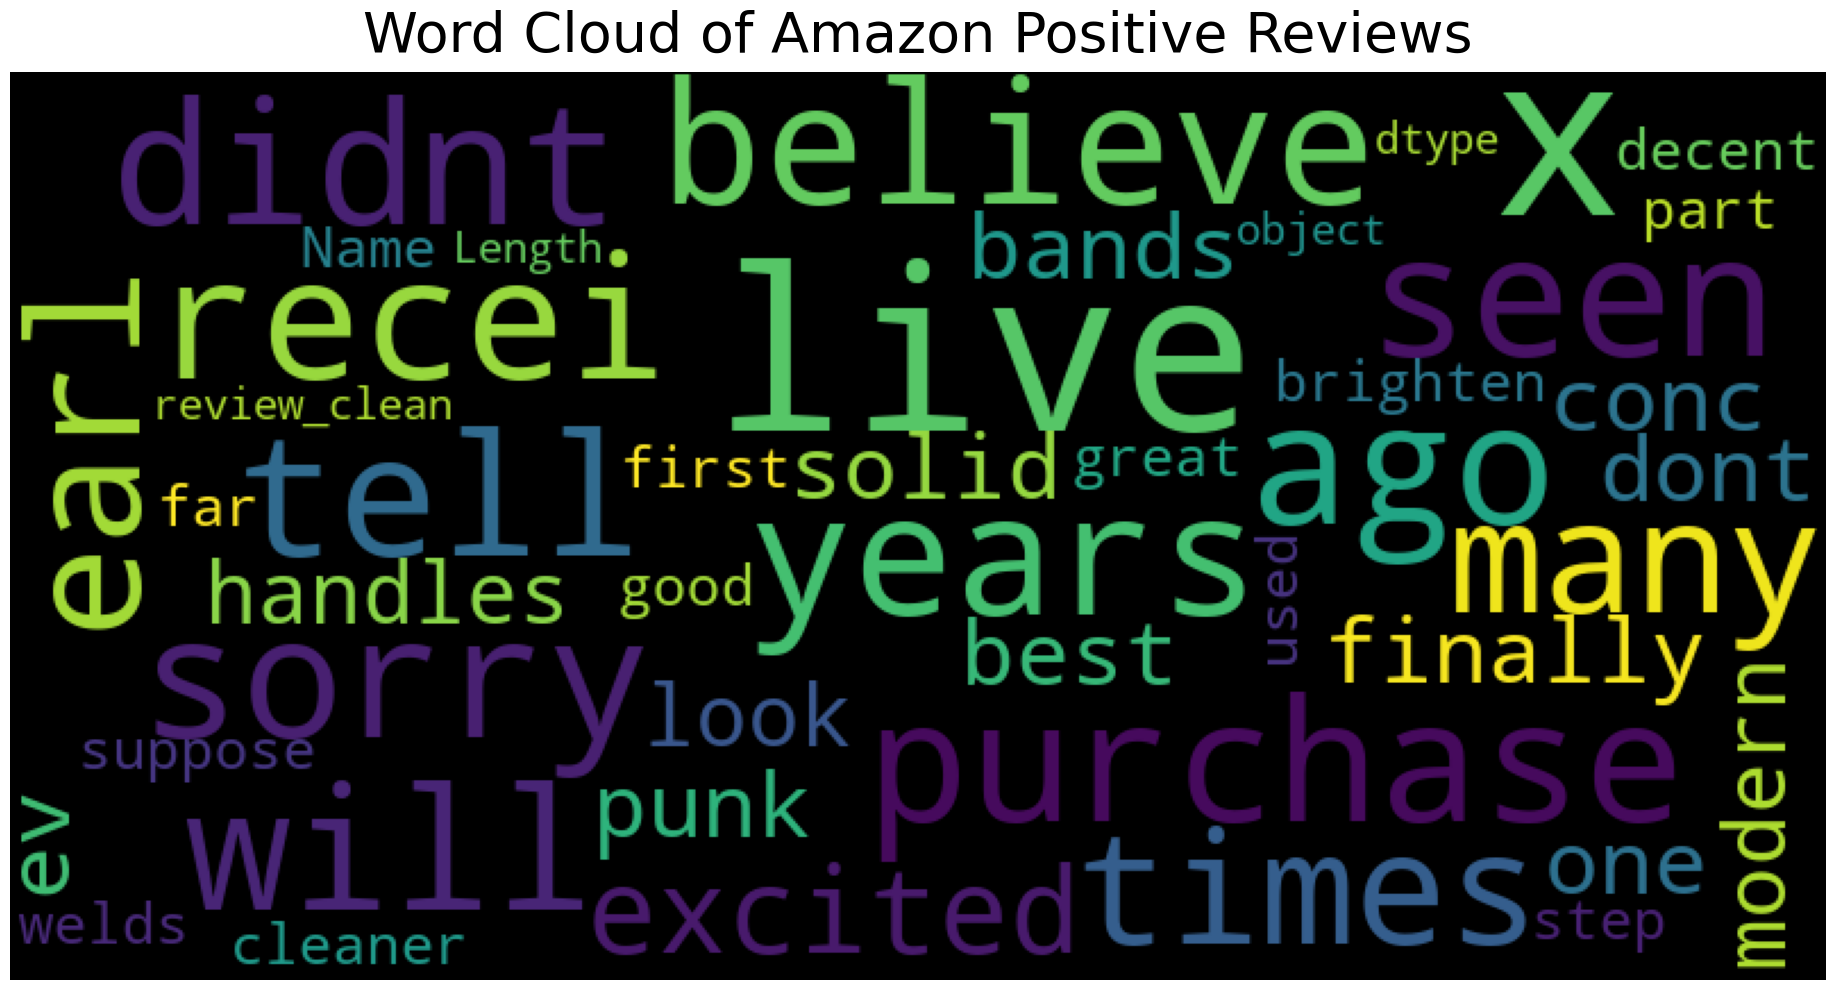

In [54]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

data_pos = data.loc[data['sentiment'] == 2]
data_neg = data.loc[data['sentiment'] == 0]
data_notr = data.loc[data['sentiment'] == 2]
stop_words = set(STOPWORDS)
wordcloud = WordCloud(background_color='black', stopwords = stop_words,max_words = 500,
                    max_font_size = 100, random_state = 42, width=800, height=400)
# какие слова составляют позитивный отзыв
wordcloud.generate(str(data_pos['review_clean']))
plt.figure(figsize=(30.0,10.0))
plt.imshow(wordcloud);
plt.title(f"Word Cloud of Amazon Positive Reviews", fontdict={'size': 40, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout() 

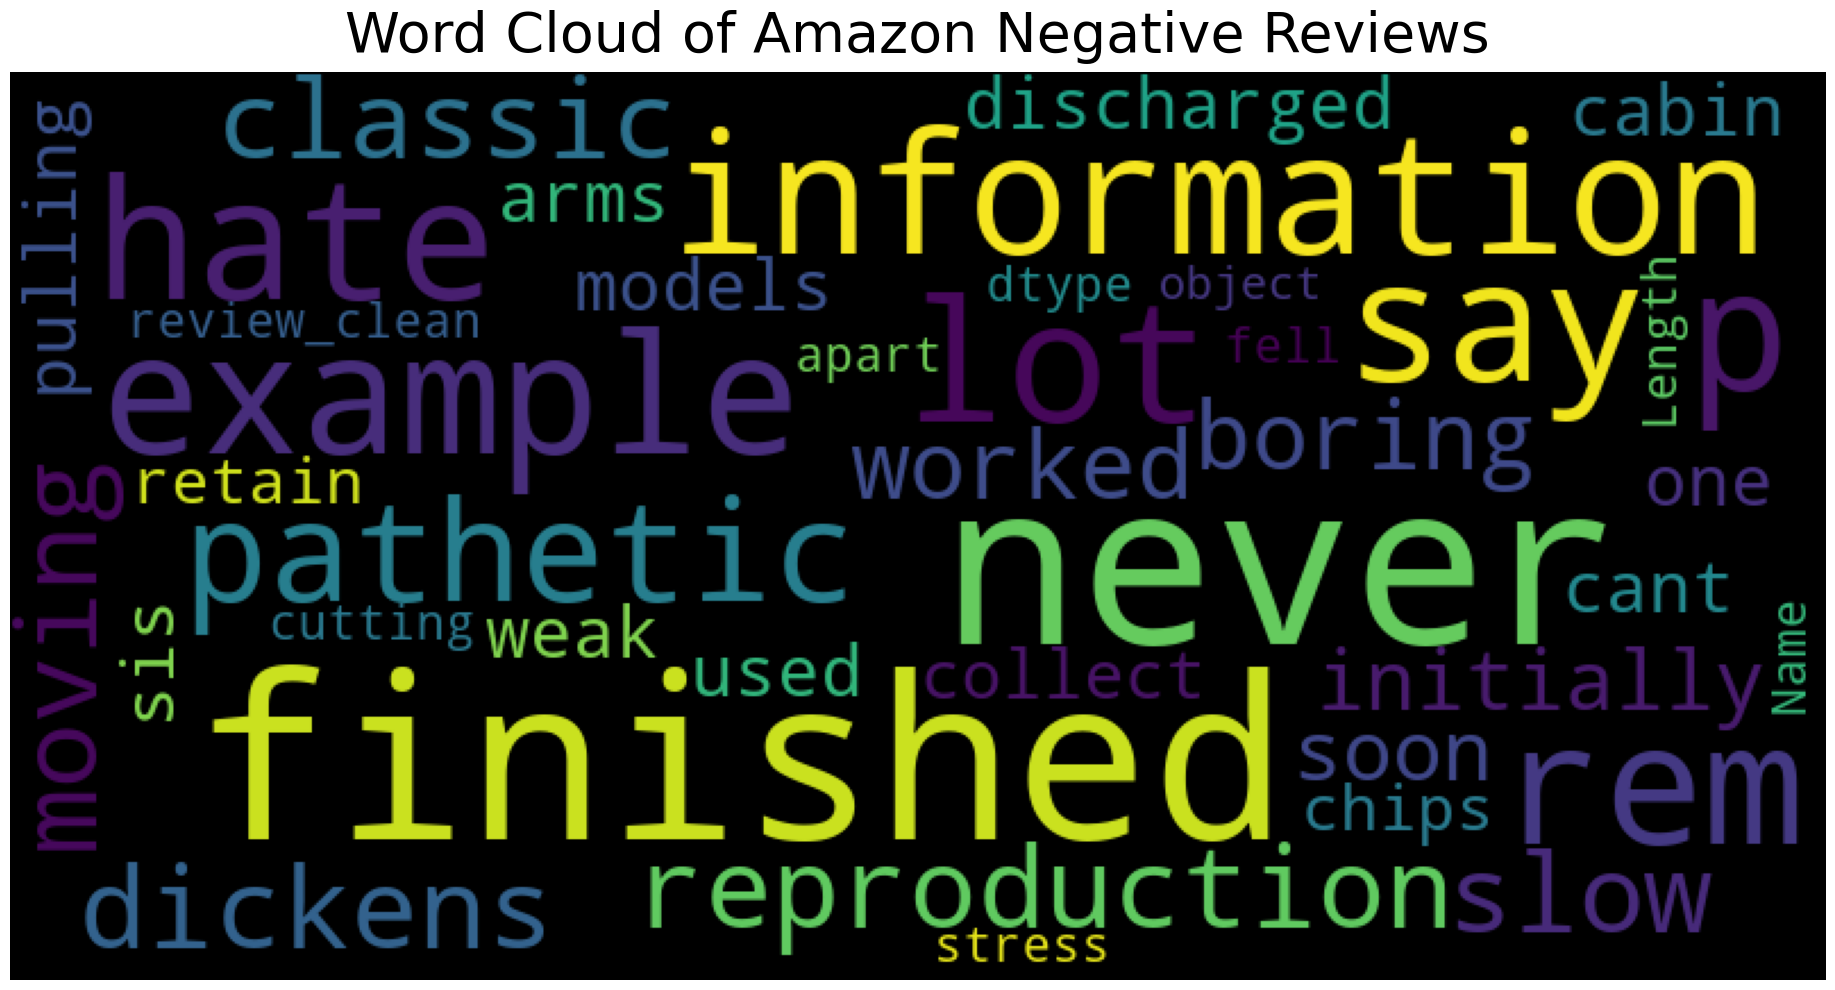

In [55]:
# для негативных
wordcloud.generate(str(data_neg['review_clean']))
plt.figure(figsize=(30.0,10.0))
plt.imshow(wordcloud);
plt.title(f"Word Cloud of Amazon Negative Reviews", fontdict={'size': 40, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout()  

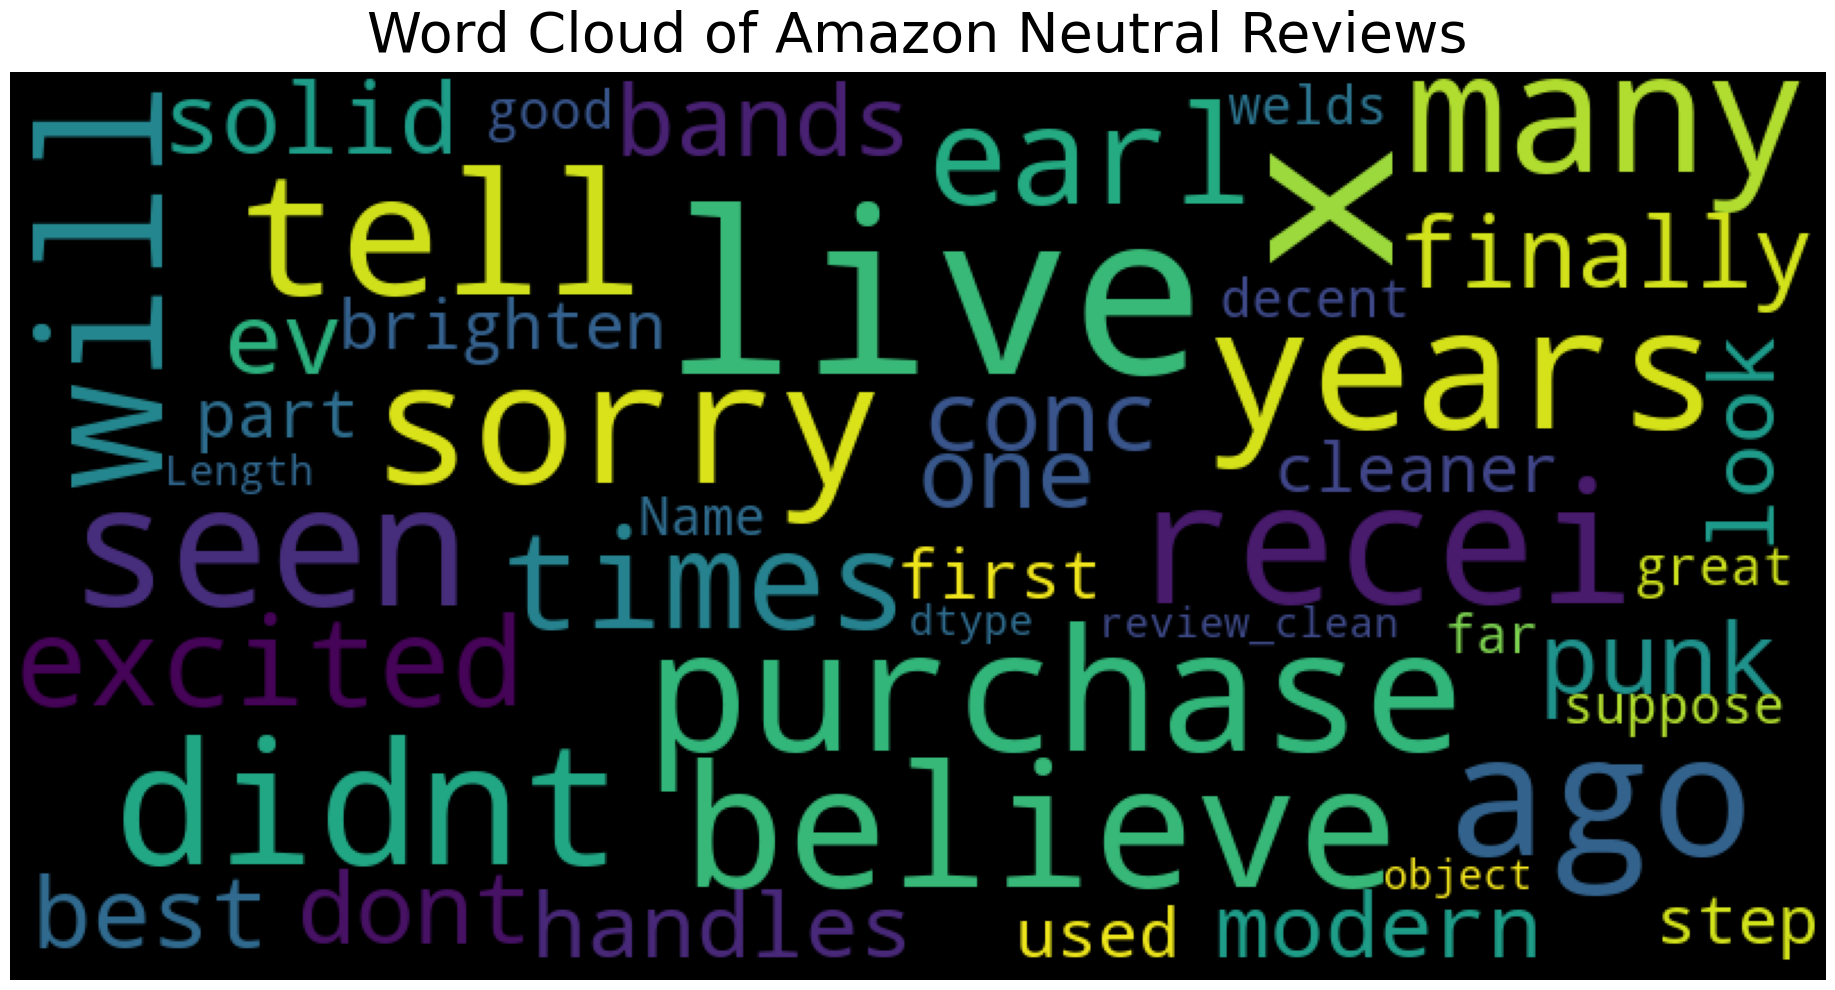

In [56]:
# to see neutral wordcloud
wordcloud.generate(str(data_notr['review_clean']))
plt.figure(figsize=(30.0,10.0))
plt.imshow(wordcloud);
plt.title(f"Word Cloud of Amazon Neutral Reviews", fontdict={'size': 40, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout()  

In [57]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [58]:
def word_count(reviews):
    '''This function tokenize and count the words in text'''
    word_num={}
    for i in reviews:
        token = nltk.word_tokenize(i)
        for t in token:
            if t not in word_num.keys():
                word_num[t] = 1
            else:
                word_num[t] += 1  
    return word_num


Другой способ нахождения мешка слов среди отзывов

In [59]:
word_frequency=word_count(data_pos['review_clean']) #tokenize and count and create dictionary
# to create dataframe from most common words dictionary

data_pos_count = pd.DataFrame(columns=['word', 'count'])
data_pos_count['word'] = word_frequency.keys()
data_pos_count['count'] = list(word_frequency.values())
data_pos_count=data_pos_count.sort_values(by=['count'], ascending=False)
data_pos_count=data_pos_count.reset_index(drop=True)

In [60]:
stop = set(stopwords.words("english")) #setting stopwords

Сделаю дополнительный столбец в котором нет стоп слов

In [61]:
data_pos_count['word_without_stop'] = data_pos_count['word'].apply(lambda x: ''.join([word for word in x.split() if word not in (stop)]))

# dropping stop words columns
data_pos_without_stop = data_pos_count.dropna(subset=['word_without_stop'])

# taking top 25 words
data_top_25_pos = data_pos_count.loc[data_pos_count['word_without_stop']!=''].head(25)

In [62]:
data_top_25_pos

,word,count,word_without_stop
14,movie,184283,movie
20,film,128725,film
21,one,127125,one
23,great,120494,great
32,good,89599,good
40,like,72377,like
47,time,60845,time
50,well,59401,well
51,love,58845,love
61,would,46657,would


<AxesSubplot:title={'center':'Positive Reviews Common Words'}, xlabel='word', ylabel='count'>

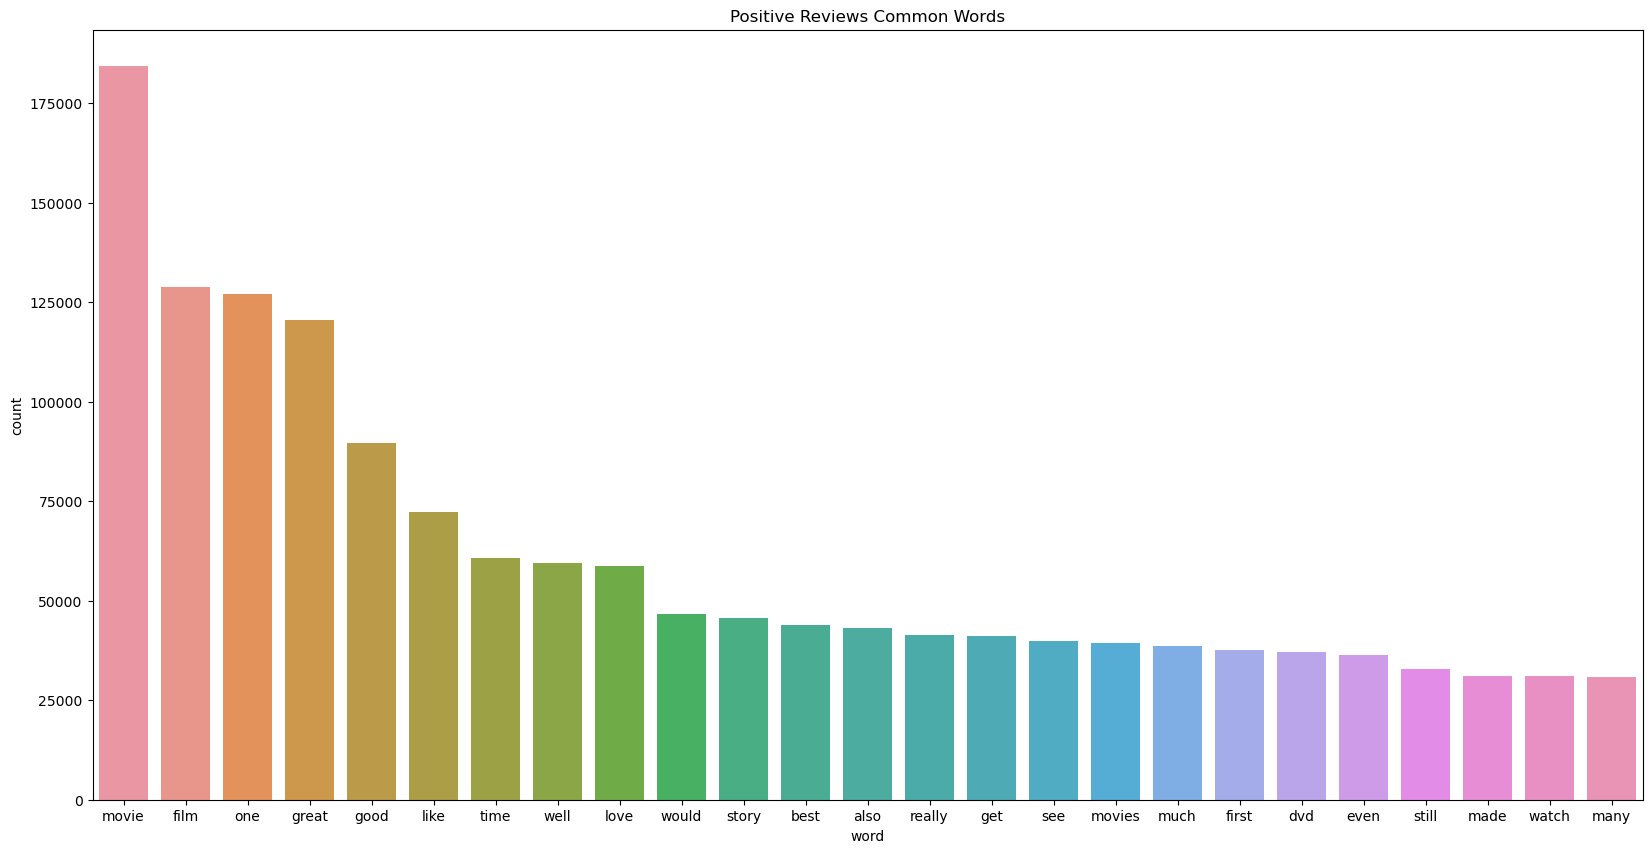

In [63]:
plt.figure(figsize=(20,10))
plt.title('Positive Reviews Common Words')
sns.barplot(data=data_top_25_pos, x="word",y="count")

<AxesSubplot:title={'center':'Neutral Reviews Common Words'}, xlabel='word', ylabel='count'>

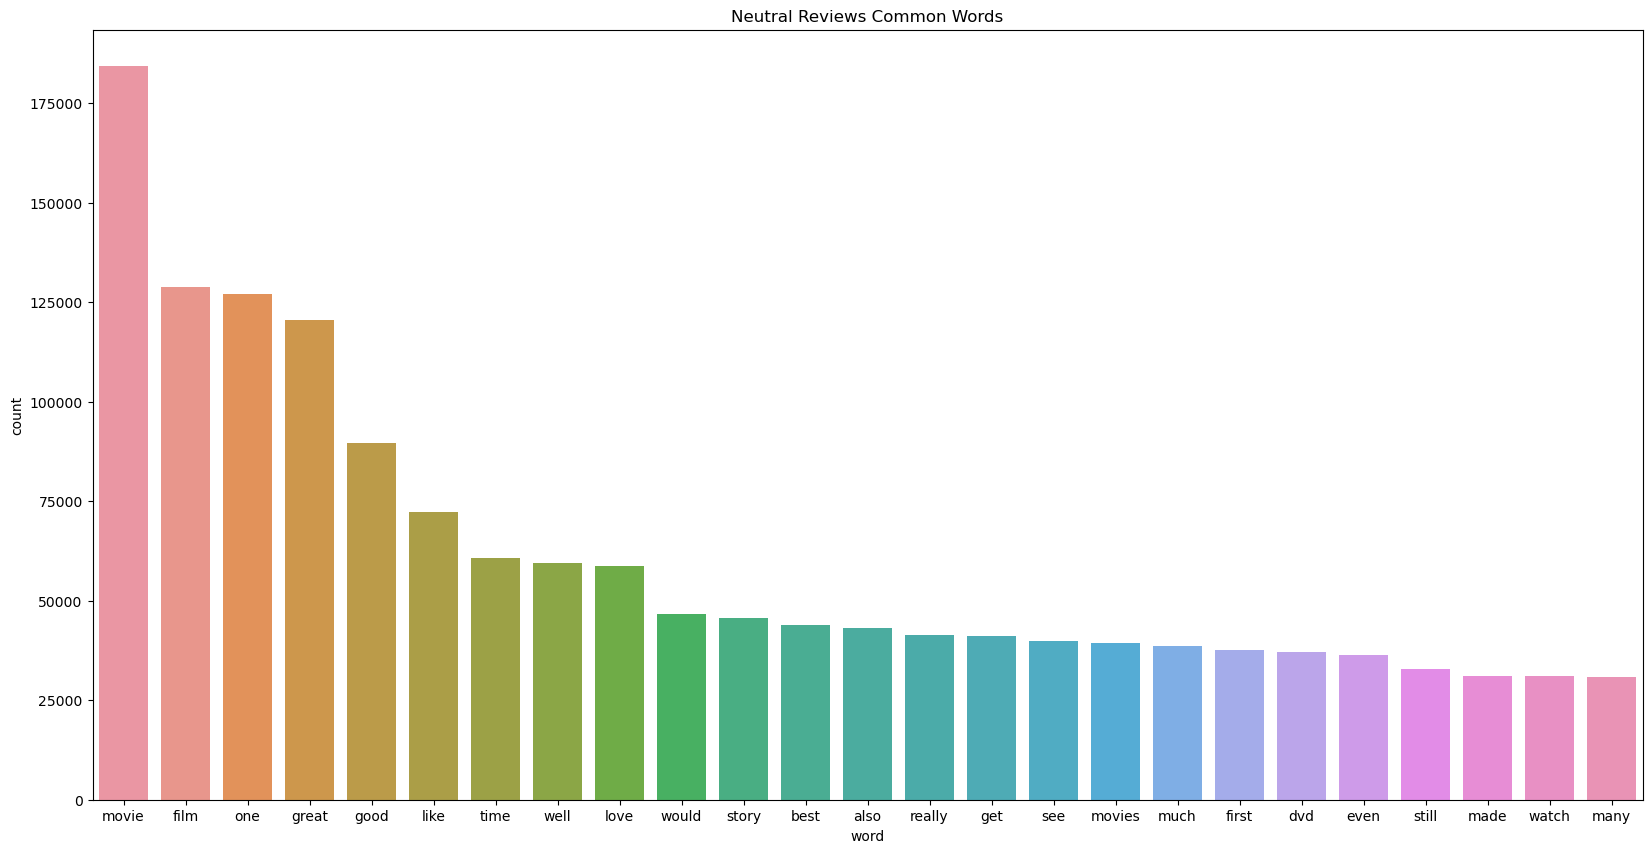

In [64]:
word_frequency_notr = word_count(data_notr['review_clean']) #tokenize and count and create dictionary
# to create dataframe from most common words dictionary

data_nt_count = pd.DataFrame(columns=['word', 'count'])
data_nt_count['word'] = word_frequency_notr.keys()
data_nt_count['count'] = list(word_frequency_notr.values())
data_nt_count=data_nt_count.sort_values(by=['count'], ascending=False)
data_nt_count=data_nt_count.reset_index(drop=True)

data_nt_count['word_without_stop'] = data_nt_count['word'].apply(lambda x: ''.join([word for word in x.split() if word not in (stop)]))

# dropping stop words columns
data_nt_without_stop = data_nt_count.dropna(subset=['word_without_stop'])

# taking top 25 words
data_top_25_nt = data_nt_count.loc[data_nt_count['word_without_stop']!=''].head(25)

plt.figure(figsize=(20,10))
plt.title('Neutral Reviews Common Words')
sns.barplot(x="word",y="count", data=data_top_25_nt)

<AxesSubplot:title={'center':'Neutral Reviews Common Words'}, xlabel='word', ylabel='count'>

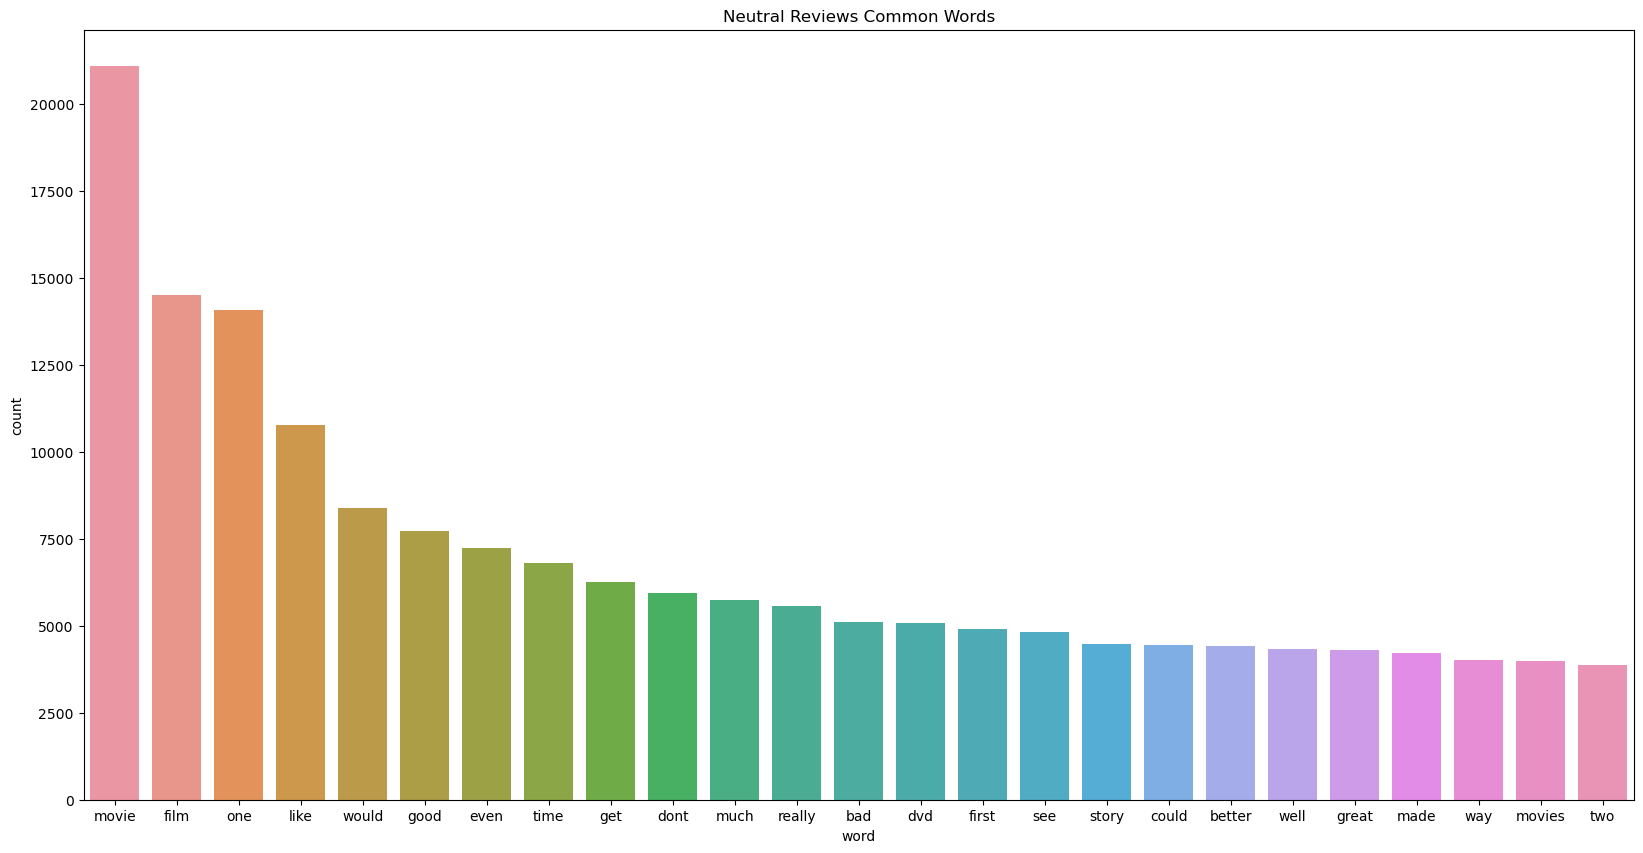

In [65]:
word_frequency_neg = word_count(data_neg['review_clean']) #tokenize and count and create dictionary
# to create dataframe from most common words dictionary

data_neg_count = pd.DataFrame(columns=['word', 'count'])
data_neg_count['word'] = word_frequency_neg.keys()
data_neg_count['count'] = list(word_frequency_neg.values())
data_neg_count=data_neg_count.sort_values(by=['count'], ascending=False)
data_neg_count=data_neg_count.reset_index(drop=True)

data_neg_count['word_without_stop'] = data_neg_count['word'].apply(lambda x: ''.join([word for word in x.split() if word not in (stop)]))

# dropping stop words columns
data_neg_without_stop = data_neg_count.dropna(subset=['word_without_stop'])

# taking top 25 words
data_top_25_neg = data_neg_count.loc[data_neg_count['word_without_stop']!=''].head(25)

plt.figure(figsize=(20,10))
plt.title('Neutral Reviews Common Words')
sns.barplot(x="word",y="count", data=data_top_25_neg)